In [1]:
#importing the python pacakges datareading,math,visulizations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Read the dataset
Track_df=pd.read_csv('Genres_url.csv')

In [3]:
#copy the dataset in excel
Track_df.to_excel('Genres_Reco.xlsx',index=False)

In [4]:
# Read the in excel sheet
songs=pd.read_excel('Genres_Reco.xlsx',engine='openpyxl')

In [5]:
#showing the datset information 10 rows
songs.head(10)

Name            Artist    genres  acousticness  \
0      Blister In The Sun    Violent Femmes  acoustic       0.31600   
1               Love Song    Sara Bareilles  acoustic       0.02080   
2               I'm Yours        Jason Mraz  acoustic       0.55900   
3                 Hold On  Chord Overstreet  acoustic       0.46900   
4               I'm Yours        Jason Mraz  acoustic       0.55900   
5  You Are the Best Thing    Ray LaMontagne  acoustic       0.03040   
6         I Won't Give Up        Jason Mraz  acoustic       0.69400   
7  I Was Born To Love You    Ray LaMontagne  acoustic       0.79400   
8        Naked as We Came       Iron & Wine  acoustic       0.65300   
9                   Brave    Sara Bareilles  acoustic       0.00502   

   danceability  duration_ms  energy  instrumentalness  liveness  loudness  \
0         0.726       145706   0.537          0.000000    0.0707    -8.896   
1         0.583       258826   0.786          0.000000    0.1880    -3.142   
2         0.703       242946   0.444          0.000000    0.0973    -9.331   
3         0.618       198853   0.443          0.000000    0.0829    -9.681   
4         0.703       242946   0.444          0.000000    0.0973    -9.331   
5         0.578       231840   0.727          0.000020    0.1720    -4.872   
6         0.483       240165   0.303          0.000000    0.1150   -10.058   
7         0.650       265843   0.271          0.000069    0.1960   -11.081   
8         0.386       152613   0.205          0.044800    0.1060   -16.699   
9         0.551       220573   0.836          0.000021    0.0425    -3.838   

   speechiness    tempo  valence  popularity  mode  key  \
0       0.1140   96.889    0.882          71     1    0   
1       0.0301  123.055    0.573          73     0    2   
2       0.0417  150.960    0.712          76     1   11   
3       0.0526  119.949    0.167          77     1    2   
4       0.0417  150.960    0.712          77     1   11   
5       0.0332  170.593    0.885          67     1   10   
6       0.0429  133.406    0.139          67     1    4   
7       0.0314   78.036    0.210          67     1    9   
8       0.0366  172.373    0.623          67     1    4   
9       0.0524  185.063    0.758          66     0   10   

                                     album_image_url  \
0  https://i.scdn.co/image/ab67616d0000b27354096a...   
1  https://i.scdn.co/image/ab67616d0000b2731c3e0a...   
2  https://i.scdn.co/image/ab67616d0000b273125b1a...   
3  https://i.scdn.co/image/ab67616d0000b273c60473...   
4  https://i.scdn.co/image/ab67616d0000b27333091f...   
5  https://i.scdn.co/image/ab67616d0000b273b73283...   
6  https://i.scdn.co/image/ab67616d0000b27346e379...   
7  https://i.scdn.co/image/ab67616d0000b273491065...   
8  https://i.scdn.co/image/ab67616d0000b273031c73...   
9  https://i.scdn.co/image/ab67616d0000b273022b40...   

                                           track_url  
0  {'spotify': 'https://open.spotify.com/track/7j...  
1  {'spotify': 'https://open.spotify.com/track/4E...  
2  {'spotify': 'https://open.spotify.com/track/1E...  
3  {'spotify': 'https://open.spotify.com/track/5v...  
4  {'spotify': 'https://open.spotify.com/track/3S...  
5  {'spotify': 'https://open.spotify.com/track/1j...  
6  {'spotify': 'https://open.spotify.com/track/53...  
7  {'spotify': 'https://open.spotify.com/track/24...  
8  {'spotify': 'https://open.spotify.com/track/6U...  
9  {'spotify': 'https://open.spotify.com/track/6U...

In [6]:
# Download the texblod this was using to duplicate lanaguages
from textblob import download_corpora
download_corpora.download_all()


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [7]:
from textblob import TextBlob

# Define a function to check if a given song name is in English
def is_english(name):
    try:
        # Detect the language of the song name using TextBlob
        detected_language = TextBlob(name).detect_language()
        
        # Print the song name and the detected language
        print(f"Song: {name}, Detected Language: {detected_language}")
        
        # Return True if the detected language is English, otherwise return False
        return detected_language == 'en'
    except Exception as e:
        # Print an error message if there's an issue detecting the language
        print(f"Error detecting language for song: {name}, Error: {e}")
        # Return False if an exception occurs
        return False


In [8]:
def is_english(name):
    try:
        # If the title has fewer than 2 words, it might not detect the language properly
        if len(name.split()) < 2:
            return False
        
        # Detect the language of the song name using TextBlob
        detected_language = TextBlob(name).detect_language()
        
        # Return True if the detected language is English, otherwise return False
        return detected_language == 'en'
    except Exception:
        # Return False if an exception occurs during language detection
        return False


In [9]:
import re

def is_english(name):
    try:
        # A basic heuristic: Check if the title contains only English letters, numbers, spaces, and common punctuation
        return bool(re.match("^[a-zA-Z0-9\s,.'-]+$", name))
    except Exception:
        # Return False if an exception occurs during the check
        return False


In [10]:
songs['is_english'] = songs['Name'].apply(is_english)
english_tracks = songs[songs['is_english']].drop(columns=['is_english'])

# Display the filtered dataset
print(english_tracks.head())

# Save the filtered DataFrame to a new Excel file if needed
english_tracks.to_excel('Genres_English_Tracks.xlsx', index=False)

                 Name            Artist    genres  acousticness  danceability  \
0  Blister In The Sun    Violent Femmes  acoustic        0.3160         0.726   
1           Love Song    Sara Bareilles  acoustic        0.0208         0.583   
2           I'm Yours        Jason Mraz  acoustic        0.5590         0.703   
3             Hold On  Chord Overstreet  acoustic        0.4690         0.618   
4           I'm Yours        Jason Mraz  acoustic        0.5590         0.703   

   duration_ms  energy  instrumentalness  liveness  loudness  speechiness  \
0       145706   0.537               0.0    0.0707    -8.896       0.1140   
1       258826   0.786               0.0    0.1880    -3.142       0.0301   
2       242946   0.444               0.0    0.0973    -9.331       0.0417   
3       198853   0.443               0.0    0.0829    -9.681       0.0526   
4       242946   0.444               0.0    0.0973    -9.331       0.0417   

     tempo  valence  popularity  mode  key  \
0   

In [11]:
# Load the Excel file 'Genres_English_Tracks.xlsx' into a DataFrame
# Specify 'openpyxl' as the engine to handle the Excel file
Track = pd.read_excel('Genres_English_Tracks.xlsx', engine='openpyxl')

In [12]:
Track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21803 entries, 0 to 21802
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              21803 non-null  object 
 1   Artist            21803 non-null  object 
 2   genres            21803 non-null  object 
 3   acousticness      21803 non-null  float64
 4   danceability      21803 non-null  float64
 5   duration_ms       21803 non-null  int64  
 6   energy            21803 non-null  float64
 7   instrumentalness  21803 non-null  float64
 8   liveness          21803 non-null  float64
 9   loudness          21803 non-null  float64
 10  speechiness       21803 non-null  float64
 11  tempo             21803 non-null  float64
 12  valence           21803 non-null  float64
 13  popularity        21803 non-null  int64  
 14  mode              21803 non-null  int64  
 15  key               21803 non-null  int64  
 16  album_image_url   21803 non-null  object

In [13]:
Track.isnull().sum()

Name                0
Artist              0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
mode                0
key                 0
album_image_url     0
track_url           0
dtype: int64

Track=Track.drop(columns=['language'],axis=True)

In [14]:
for column in Track.columns:
    if Track[column].duplicated().any(): 
        print(f"duplicated in '{column}'columns:")
        duplicated=Track[Track[column].duplicated()]
        print(duplicated[[column]])
        print('\n')

duplicated in 'Name'columns:
              Name
4        I'm Yours
20           Lucky
47       Love Song
48         Hold On
49       I'm Yours
...            ...
21797  Like A Boss
21798  My Feelings
21799        Valse
21800     Kehribar
21801     Tomorrow

[16278 rows x 1 columns]


duplicated in 'Artist'columns:
               Artist
4          Jason Mraz
6          Jason Mraz
7      Ray LaMontagne
9      Sara Bareilles
11        Iron & Wine
...               ...
21797            NOES
21798   Serhat Durmus
21799   Evgeny Grinko
21800     Burak Bulut
21801   Evgeny Grinko

[19398 rows x 1 columns]


duplicated in 'genres'columns:
         genres
1      acoustic
2      acoustic
3      acoustic
4      acoustic
5      acoustic
...         ...
21798   turkish
21799   turkish
21800   turkish
21801   turkish
21802   turkish

[21692 rows x 1 columns]


duplicated in 'acousticness'columns:
       acousticness
4            0.5590
20           0.2940
22           0.9830
47           0.0208
48  

In [15]:
# Remove duplicates and keep the first occurrence
Track = Track.drop_duplicates()

print("DataFrame after removing duplicates:")
print(Track)


DataFrame after removing duplicates:
                         Name            Artist    genres  acousticness  \
0          Blister In The Sun    Violent Femmes  acoustic        0.3160   
1                   Love Song    Sara Bareilles  acoustic        0.0208   
2                   I'm Yours        Jason Mraz  acoustic        0.5590   
3                     Hold On  Chord Overstreet  acoustic        0.4690   
4                   I'm Yours        Jason Mraz  acoustic        0.5590   
...                       ...               ...       ...           ...   
21761        This Is The Life  Umur Anil Gokdag   turkish        0.0561   
21762   Otan Ponao To Glentao         Knock Out   turkish        0.1550   
21768  Somewhere Only We Know  Umur Anil Gokdag   turkish        0.0802   
21770            Antidepresan        Mert Demir   turkish        0.0297   
21802                  6 Days      Mahmut Orhan   turkish        0.0293   

       danceability  duration_ms  energy  instrumentalness  li

In [16]:
Track.duplicated().sum()

0

In [17]:
Track.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8008 entries, 0 to 21802
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8008 non-null   object 
 1   Artist            8008 non-null   object 
 2   genres            8008 non-null   object 
 3   acousticness      8008 non-null   float64
 4   danceability      8008 non-null   float64
 5   duration_ms       8008 non-null   int64  
 6   energy            8008 non-null   float64
 7   instrumentalness  8008 non-null   float64
 8   liveness          8008 non-null   float64
 9   loudness          8008 non-null   float64
 10  speechiness       8008 non-null   float64
 11  tempo             8008 non-null   float64
 12  valence           8008 non-null   float64
 13  popularity        8008 non-null   int64  
 14  mode              8008 non-null   int64  
 15  key               8008 non-null   int64  
 16  album_image_url   8008 non-null   object 
 17 

In [18]:
print(Track['genres'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro' 'electronic'
 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german' 'gospel' 'goth'
 'grindcore' 'groove' 'grunge' 'guitar' 'happy' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk' 'house' 'idm' 'indian'
 'indie' 'indie-pop' 'industrial' 'iranian' 'j-dance' 'j-idol' 'j-pop'
 'j-rock' 'jazz' 'k-pop' 'kids' 'latin' 'latino' 'malay' 'metal'
 'metalcore' 'minimal-techno' 'mpb' 'new-age' 'opera' 'pagode' 'party'
 'piano' 'pop' 'pop-film' 'power-pop' 'progressive-house' 'psych-rock'
 'punk' 'punk-rock' 'r-n-b' 'reggae' 'reggaeton' 'rock' 'rock-n-roll'
 'rockabilly' 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-song

In [19]:
print(Track['genres'].value_counts())

genres
reggae               128
gospel               120
children             118
dub                  109
garage               107
                    ... 
classical             36
progressive-house     33
romance               25
opera                 16
cantopop               5
Name: count, Length: 111, dtype: int64


Visulization

In [20]:
Track.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8008 entries, 0 to 21802
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8008 non-null   object 
 1   Artist            8008 non-null   object 
 2   genres            8008 non-null   object 
 3   acousticness      8008 non-null   float64
 4   danceability      8008 non-null   float64
 5   duration_ms       8008 non-null   int64  
 6   energy            8008 non-null   float64
 7   instrumentalness  8008 non-null   float64
 8   liveness          8008 non-null   float64
 9   loudness          8008 non-null   float64
 10  speechiness       8008 non-null   float64
 11  tempo             8008 non-null   float64
 12  valence           8008 non-null   float64
 13  popularity        8008 non-null   int64  
 14  mode              8008 non-null   int64  
 15  key               8008 non-null   int64  
 16  album_image_url   8008 non-null   object 
 17 

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'key'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

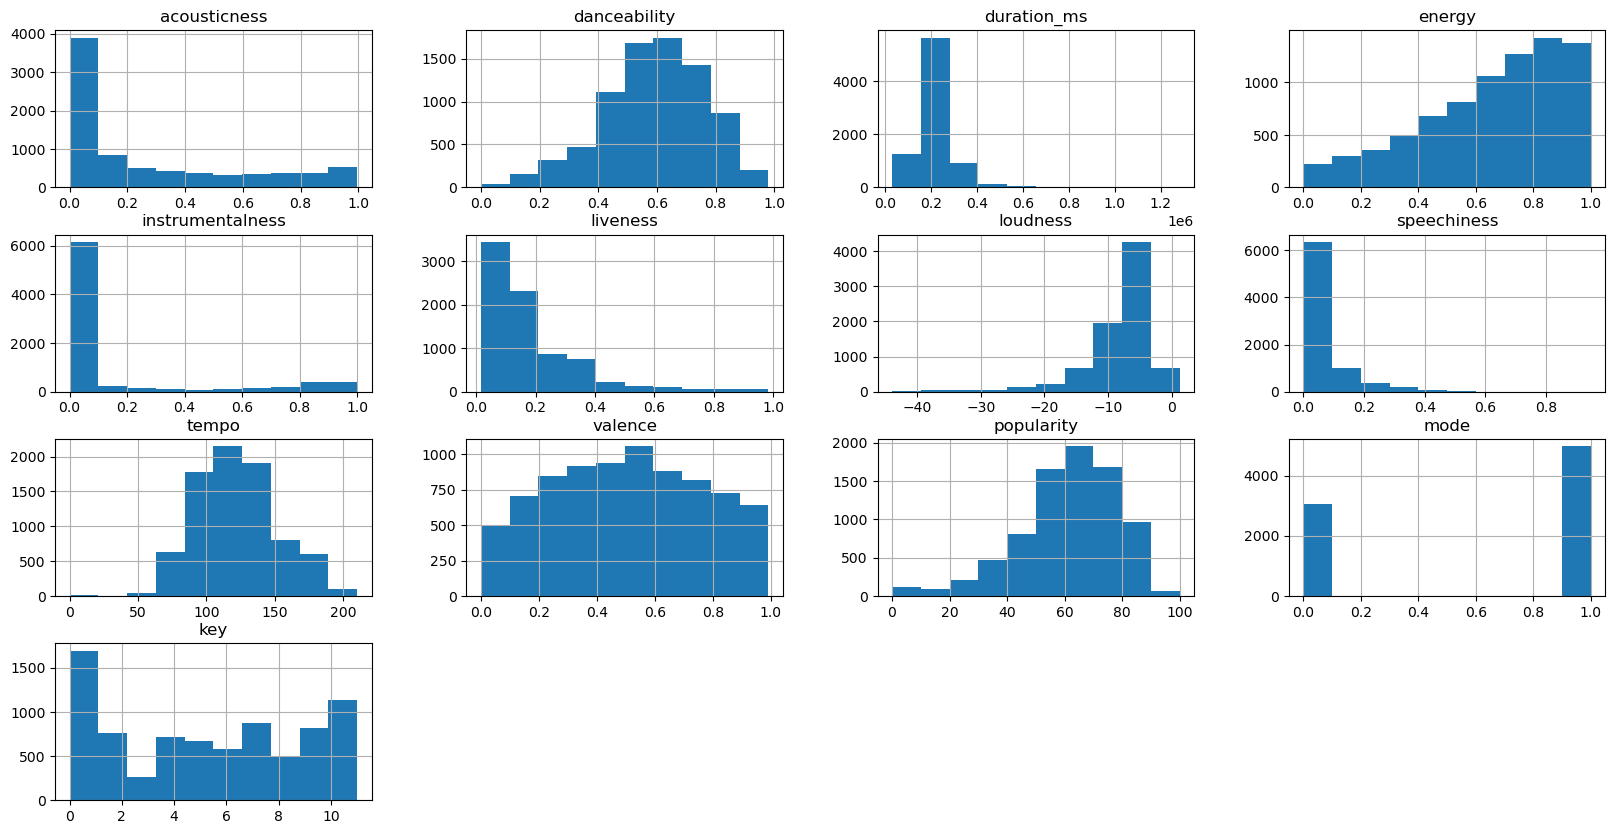

In [21]:
#Hist visulization 
Track.hist(figsize=(20,10))

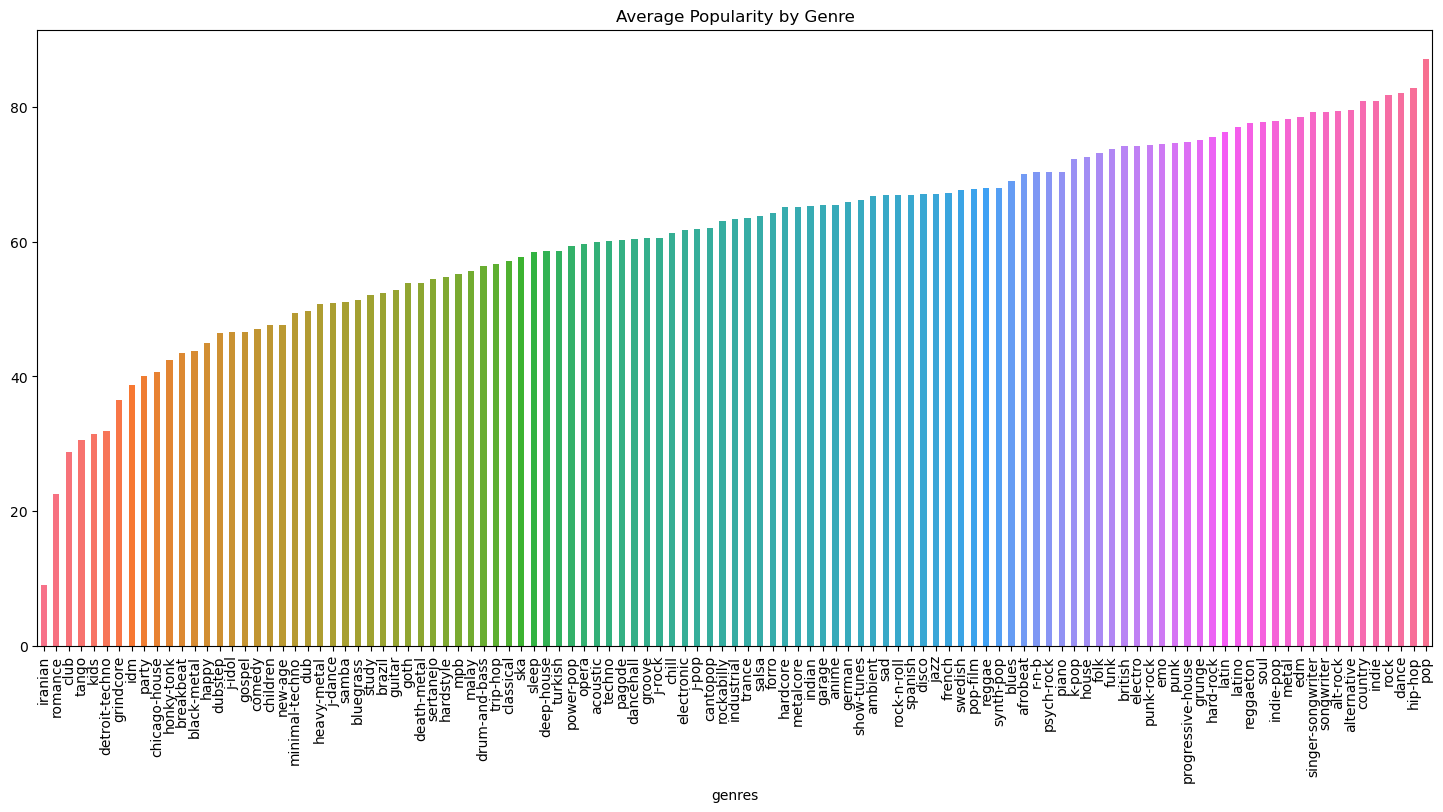

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average popularity for each genre by grouping the DataFrame by 'genres' and computing the mean of 'popularity'
popularity_by_genre = Track.groupby('genres')['popularity'].mean()

# Define a color palette with 'husl' and the number of colors equal to the number of genres
palette = sns.color_palette('husl', len(popularity_by_genre))

# Create a figure with a specific size for the plot
plt.figure(figsize=(18, 8))

# Plot the average popularity for each genre as a bar chart, using the defined color palette
popularity_by_genre.sort_values().plot(kind='bar', color=palette)

# Set the title of the plot
plt.title('Average Popularity by Genre')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=90)

# Display the plot
plt.show()


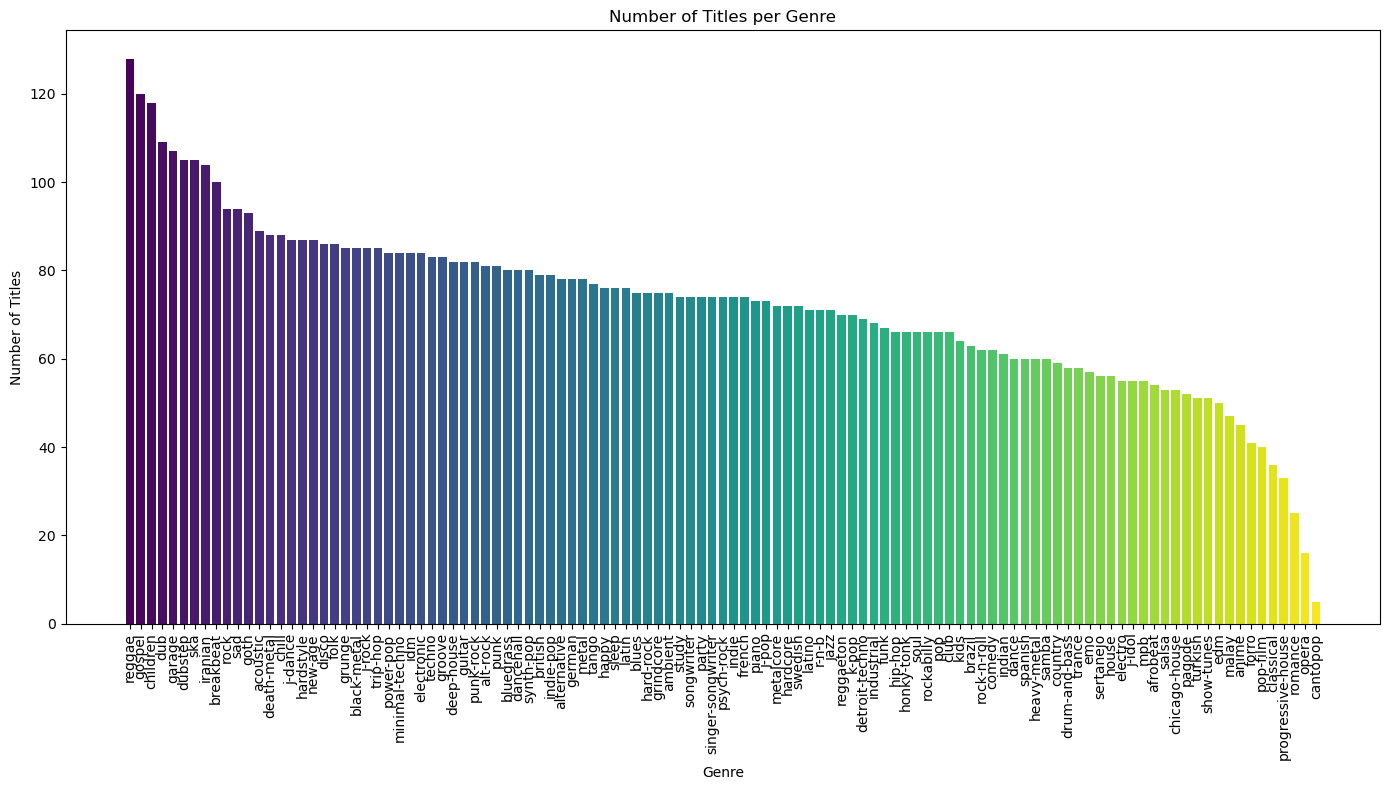

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of titles for each genre by counting occurrences in the 'genres' column
title_count_by_genre = Track['genres'].value_counts()

# Define a color palette using 'viridis', with a number of colors equal to the number of genres
palette = sns.color_palette('viridis', len(title_count_by_genre))

# Create a figure with a specific size for the plot
plt.figure(figsize=(14, 8))

# Plot the number of titles per genre as a bar chart, using the defined color palette
plt.bar(title_count_by_genre.index, title_count_by_genre.values, color=palette)

# Set the title of the plot
plt.title('Number of Titles per Genre')

# Label the x-axis
plt.xlabel('Genre')

# Label the y-axis
plt.ylabel('Number of Titles')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=90)

# Adjust the layout to fit labels and other elements
plt.tight_layout()

# Display the plot
plt.show()


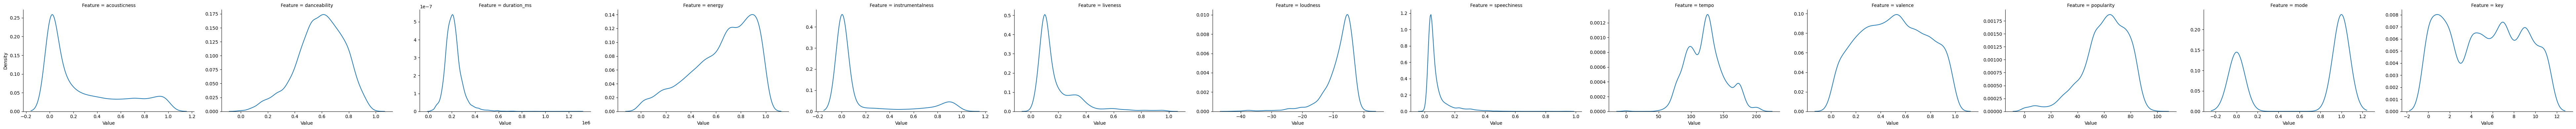

In [24]:
import pandas as pd
import seaborn as sns

# Define a list of feature columns to include in the melted DataFrame
Track_1 = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'mode', 'key']

# Melt the DataFrame to transform the feature columns into a long format
# 'Feature' will be the name of the feature, and 'Value' will be the corresponding values
Track_long = pd.melt(Track[Track_1], var_name='Feature', value_name='Value')

# Create a displot (distribution plot) to visualize the distribution of 'Value' for each feature
# Use KDE (Kernel Density Estimate) to plot the density of values
# Set 'sharex' and 'sharey' to False to have separate x and y axes for each subplot
# Specify the height and aspect ratio for the facet grid
sns.displot(Track_long, x='Value', col='Feature', kind='kde', facet_kws={'sharex': False, 'sharey': False}, height=4, aspect=1.5)


<Figure size 1000x1000 with 0 Axes>

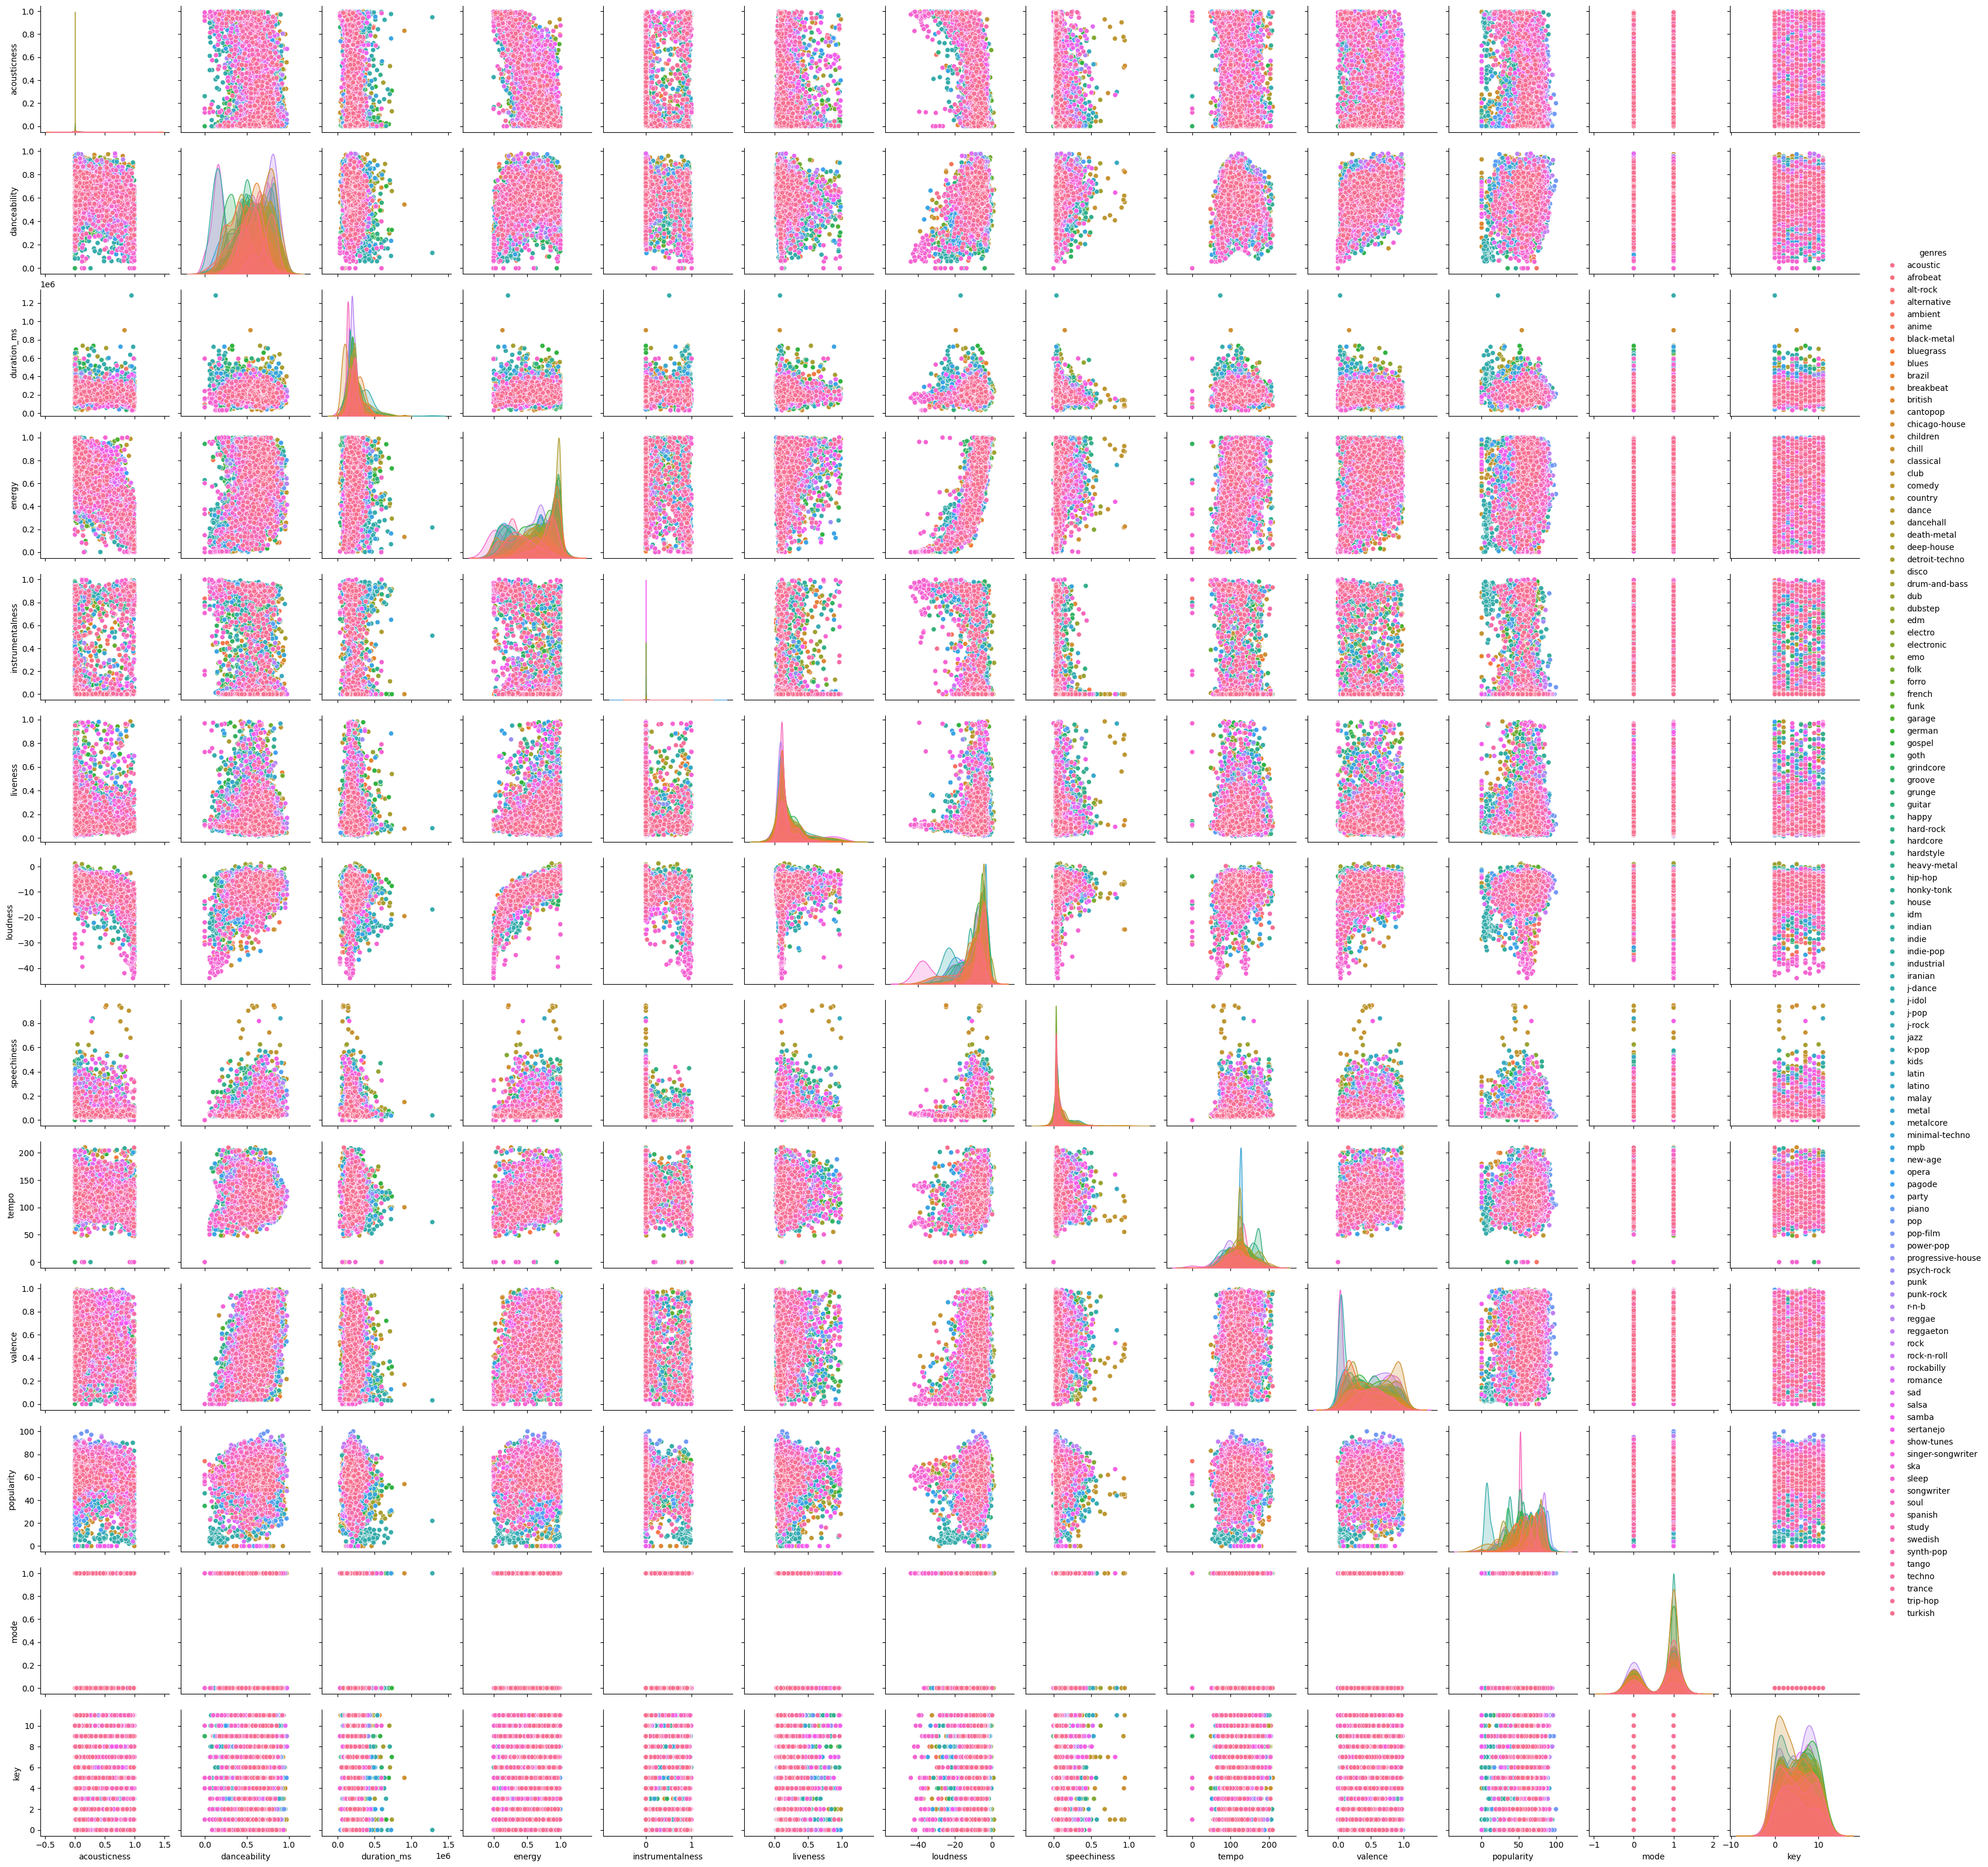

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with a specific size for the plot
plt.figure(figsize=(10, 10))

# Create a pairplot to visualize pairwise relationships in the dataset
# The 'hue' parameter is used to color the points by 'genres'
sns.pairplot(data=Track, hue='genres')

# Display the plot
plt.show()


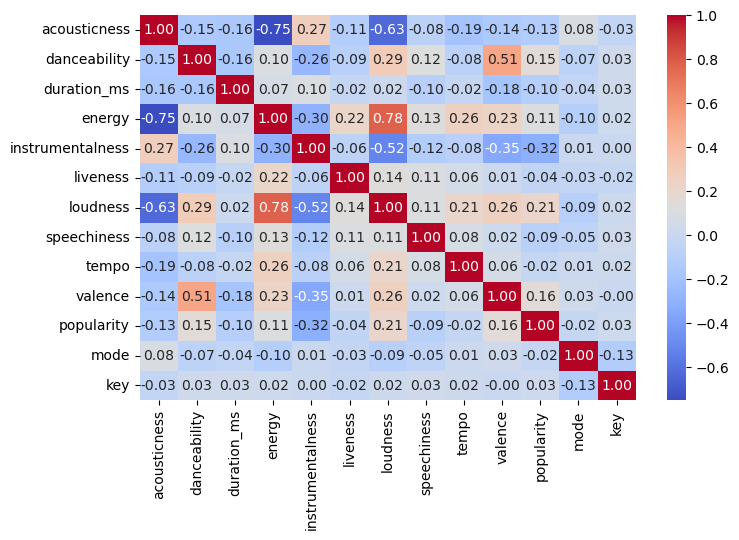

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the numerical columns in the DataFrame
corr_m = Track[Track_1].corr()

# Create a new figure with a specific size for the heatmap
plt.figure(figsize=(8, 5))

# Create a heatmap to visualize the correlation matrix
# 'annot=True' adds correlation coefficients on the heatmap
# 'cmap' specifies the color map; 'coolwarm' is used here
# 'fmt='.2f'' formats the correlation coefficients to two decimal places
sns.heatmap(corr_m, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.show()


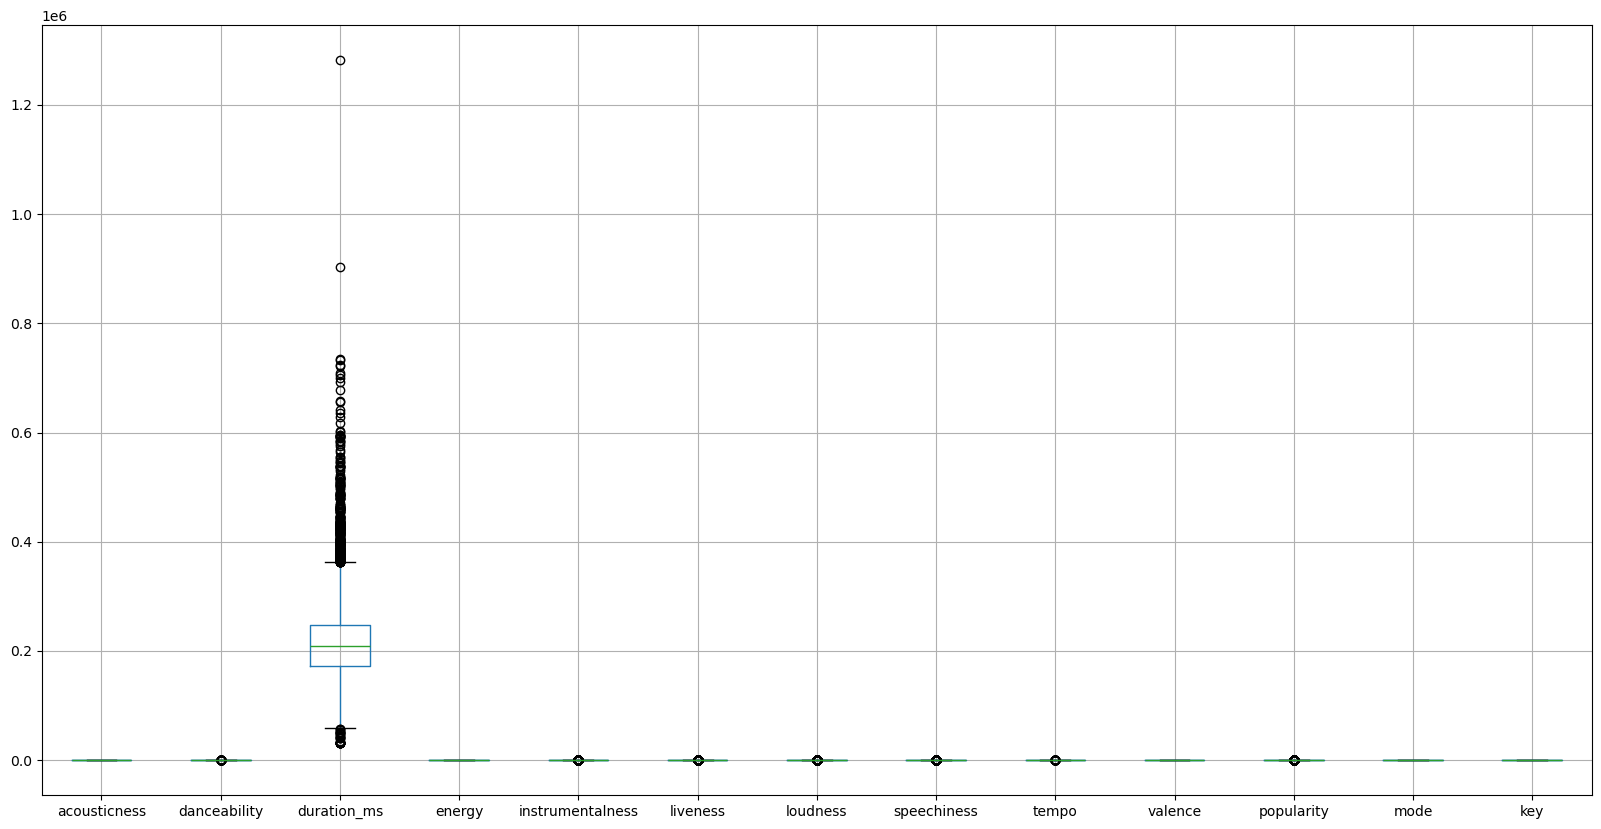

In [27]:
import matplotlib.pyplot as plt

# Create a boxplot for all numerical columns in the DataFrame
# The 'figsize' parameter specifies the size of the figure
Track.boxplot(figsize=(20, 10))

# Display the boxplot
plt.show()


In [28]:
# Calculate the first quartile (25th percentile) of the 'duration_ms' column
Q1 = Track['duration_ms'].quantile(0.25)

# Calculate the third quartile (75th percentile) of the 'duration_ms' column
Q3 = Track['duration_ms'].quantile(0.75)

# Compute the Interquartile Range (IQR) as the difference between Q3 and Q1
IQR = Q3 - Q1
print('IQR Value:', IQR)

# Determine the lower bound for outlier detection
# Values below this bound are considered outliers
lower_bound = Q1 - 1.5 * IQR
print('lower_bound:', lower_bound)

# Determine the upper bound for outlier detection
# Values above this bound are considered outliers
upper_bound = Q3 + 1.5 * IQR
print('upper_bound:', upper_bound)

# Filter the DataFrame to remove outliers in the 'duration_ms' column
# Keep only rows where 'duration_ms' is within the bounds
genre_clean = Track[(Track['duration_ms'] >= lower_bound) & (Track['duration_ms'] <= upper_bound)]

# Display the cleaned DataFrame
genre_clean


IQR Value: 75976.75
lower_bound: 58151.375
upper_bound: 362058.375


Name            Artist    genres  acousticness  \
0          Blister In The Sun    Violent Femmes  acoustic        0.3160   
1                   Love Song    Sara Bareilles  acoustic        0.0208   
2                   I'm Yours        Jason Mraz  acoustic        0.5590   
3                     Hold On  Chord Overstreet  acoustic        0.4690   
4                   I'm Yours        Jason Mraz  acoustic        0.5590   
...                       ...               ...       ...           ...   
21761        This Is The Life  Umur Anil Gokdag   turkish        0.0561   
21762   Otan Ponao To Glentao         Knock Out   turkish        0.1550   
21768  Somewhere Only We Know  Umur Anil Gokdag   turkish        0.0802   
21770            Antidepresan        Mert Demir   turkish        0.0297   
21802                  6 Days      Mahmut Orhan   turkish        0.0293   

       danceability  duration_ms  energy  instrumentalness  liveness  \
0             0.726       145706   0.537          0.000000    0.0707   
1             0.583       258826   0.786          0.000000    0.1880   
2             0.703       242946   0.444          0.000000    0.0973   
3             0.618       198853   0.443          0.000000    0.0829   
4             0.703       242946   0.444          0.000000    0.0973   
...             ...          ...     ...               ...       ...   
21761         0.698       119456   0.897          0.000048    0.0825   
21762         0.771       233350   0.814          0.000000    0.0618   
21768         0.727       128369   0.595          0.000181    0.1300   
21770         0.700       240125   0.589          0.000014    0.0987   
21802         0.776       260559   0.699          0.195000    0.1440   

       loudness  speechiness    tempo  valence  popularity  mode  key  \
0        -8.896       0.1140   96.889    0.882          71     1    0   
1        -3.142       0.0301  123.055    0.573          73     0    2   
2        -9.331       0.0417  150.960    0.712          76     1   11   
3        -9.681       0.0526  119.949    0.167          77     1    2   
4        -9.331       0.0417  150.960    0.712          77     1   11   
...         ...          ...      ...      ...         ...   ...  ...   
21761    -5.288       0.1330  108.039    0.249          55     1    6   
21762    -3.317       0.0375   96.972    0.322          42     1    2   
21768    -7.632       0.0412  114.984    0.375          49     1    8   
21770    -9.974       0.0281  100.014    0.915          66     0   11   
21802    -5.965       0.0333  104.998    0.332          57     1    7   

                                         album_image_url  \
0      https://i.scdn.co/image/ab67616d0000b27354096a...   
1      https://i.scdn.co/image/ab67616d0000b2731c3e0a...   
2      https://i.scdn.co/image/ab67616d0000b273125b1a...   
3      https://i.scdn.co/image/ab67616d0000b273c60473...   
4      https://i.scdn.co/image/ab67616d0000b27333091f...   
...                                                  ...   
21761  https://i.scdn.co/image/ab67616d0000b27374c0cd...   
21762  https://i.scdn.co/image/ab67616d0000b273e4a245...   
21768  https://i.scdn.co/image/ab67616d0000b2730768aa...   
21770  https://i.scdn.co/image/ab67616d0000b2736a4753...   
21802  https://i.scdn.co/image/ab67616d0000b273ebbfd9...   

                                               track_url  
0      {'spotify': 'https://open.spotify.com/track/7j...  
1      {'spotify': 'https://open.spotify.com/track/4E...  
2      {'spotify': 'https://open.spotify.com/track/1E...  
3      {'spotify': 'https://open.spotify.com/track/5v...  
4      {'spotify': 'https://open.spotify.com/track/3S...  
...                                                  ...  
21761  {'spotify': 'https://open.spotify.com/track/6y...  
21762  {'spotify': 'https://open.spotify.com/track/09...  
21768  {'spotify': 'https://open.spotify.com/track/3Z...  
21770  {'spotify': 'https://open.spotify.com/track/4O...  
21802  {'spo

In [29]:
# Create a copy of the DataFrame 'Track' and assign it to 'songs'
songs = Track.copy()

In [30]:
# Create a new DataFrame 'songs_df' by dropping specific columns from 'Track'
# The columns being dropped are: 'instrumentalness', 'liveness', 'tempo', 'valence', 'mode', 'key'
songs_df = Track.drop(columns=['instrumentalness', 'liveness', 'tempo', 'valence', 'mode', 'key'])

In [31]:
songs_df

Name            Artist    genres  acousticness  \
0          Blister In The Sun    Violent Femmes  acoustic        0.3160   
1                   Love Song    Sara Bareilles  acoustic        0.0208   
2                   I'm Yours        Jason Mraz  acoustic        0.5590   
3                     Hold On  Chord Overstreet  acoustic        0.4690   
4                   I'm Yours        Jason Mraz  acoustic        0.5590   
...                       ...               ...       ...           ...   
21761        This Is The Life  Umur Anil Gokdag   turkish        0.0561   
21762   Otan Ponao To Glentao         Knock Out   turkish        0.1550   
21768  Somewhere Only We Know  Umur Anil Gokdag   turkish        0.0802   
21770            Antidepresan        Mert Demir   turkish        0.0297   
21802                  6 Days      Mahmut Orhan   turkish        0.0293   

       danceability  duration_ms  energy  loudness  speechiness  popularity  \
0             0.726       145706   0.537    -8.896       0.1140          71   
1             0.583       258826   0.786    -3.142       0.0301          73   
2             0.703       242946   0.444    -9.331       0.0417          76   
3             0.618       198853   0.443    -9.681       0.0526          77   
4             0.703       242946   0.444    -9.331       0.0417          77   
...             ...          ...     ...       ...          ...         ...   
21761         0.698       119456   0.897    -5.288       0.1330          55   
21762         0.771       233350   0.814    -3.317       0.0375          42   
21768         0.727       128369   0.595    -7.632       0.0412          49   
21770         0.700       240125   0.589    -9.974       0.0281          66   
21802         0.776       260559   0.699    -5.965       0.0333          57   

                                         album_image_url  \
0      https://i.scdn.co/image/ab67616d0000b27354096a...   
1      https://i.scdn.co/image/ab67616d0000b2731c3e0a...   
2      https://i.scdn.co/image/ab67616d0000b273125b1a...   
3      https://i.scdn.co/image/ab67616d0000b273c60473...   
4      https://i.scdn.co/image/ab67616d0000b27333091f...   
...                                                  ...   
21761  https://i.scdn.co/image/ab67616d0000b27374c0cd...   
21762  https://i.scdn.co/image/ab67616d0000b273e4a245...   
21768  https://i.scdn.co/image/ab67616d0000b2730768aa...   
21770  https://i.scdn.co/image/ab67616d0000b2736a4753...   
21802  https://i.scdn.co/image/ab67616d0000b273ebbfd9...   

                                               track_url  
0      {'spotify': 'https://open.spotify.com/track/7j...  
1      {'spotify': 'https://open.spotify.com/track/4E...  
2      {'spotify': 'https://open.spotify.com/track/1E...  
3      {'spotify': 'https://open.spotify.com/track/5v...  
4      {'spotify': 'https://open.spotify.com/track/3S...  
...                                                  ...  
21761  {'spotify': 'https://open.spotify.com/track/6y...  
21762  {'spotify': 'https://open.spotify.com/track/09...  
21768  {'spotify': 'https://open.spotify.com/track/3Z...  
21770  {'spotify': 'https://open.spotify.com/track/4O...  
21802  {'spotify': 'https://open.spotify.com/track/5i...  

[8008 rows x 12 columns]

In [32]:
songs_df.isnull().sum()

Name               0
Artist             0
genres             0
acousticness       0
danceability       0
duration_ms        0
energy             0
loudness           0
speechiness        0
popularity         0
album_image_url    0
track_url          0
dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# List of numeric columns to be standardized
numeric_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'popularity', 'loudness', 'speechiness']

# Apply standardization to the numeric columns in 'songs_df'
# 'fit_transform' computes the mean and standard deviation and then scales the data
standardized_data = scaler.fit_transform(songs_df[numeric_columns])

In [34]:
import pandas as pd

# Create a DataFrame from the standardized data, with columns named according to 'numeric_columns'
stand_data = pd.DataFrame(standardized_data, columns=numeric_columns)

# Reset the index of 'songs_df', dropping the old index and modifying it in place
songs_df.reset_index(drop=True, inplace=True)

# Reset the index of 'stand_data', dropping the old index and modifying it in place
stand_data.reset_index(drop=True, inplace=True)

In [35]:
stand_data.isnull().sum()

acousticness    0
danceability    0
duration_ms     0
energy          0
popularity      0
loudness        0
speechiness     0
dtype: int64

In [36]:
# Concatenate the original DataFrame 'songs_df' (selected columns) with the standardized data 'stand_data'
# Combine along the columns (axis=1), aligning rows by index
transformed_df = pd.concat([songs_df[['Name', 'album_image_url', 'track_url', 'genres', 'Artist']], stand_data], axis=1)

In [37]:
transformed_df

Name  \
0         Blister In The Sun   
1                  Love Song   
2                  I'm Yours   
3                    Hold On   
4                  I'm Yours   
...                      ...   
8003        This Is The Life   
8004   Otan Ponao To Glentao   
8005  Somewhere Only We Know   
8006            Antidepresan   
8007                  6 Days   

                                        album_image_url  \
0     https://i.scdn.co/image/ab67616d0000b27354096a...   
1     https://i.scdn.co/image/ab67616d0000b2731c3e0a...   
2     https://i.scdn.co/image/ab67616d0000b273125b1a...   
3     https://i.scdn.co/image/ab67616d0000b273c60473...   
4     https://i.scdn.co/image/ab67616d0000b27333091f...   
...                                                 ...   
8003  https://i.scdn.co/image/ab67616d0000b27374c0cd...   
8004  https://i.scdn.co/image/ab67616d0000b273e4a245...   
8005  https://i.scdn.co/image/ab67616d0000b2730768aa...   
8006  https://i.scdn.co/image/ab67616d0000b2736a4753...   
8007  https://i.scdn.co/image/ab67616d0000b273ebbfd9...   

                                              track_url    genres  \
0     {'spotify': 'https://open.spotify.com/track/7j...  acoustic   
1     {'spotify': 'https://open.spotify.com/track/4E...  acoustic   
2     {'spotify': 'https://open.spotify.com/track/1E...  acoustic   
3     {'spotify': 'https://open.spotify.com/track/5v...  acoustic   
4     {'spotify': 'https://open.spotify.com/track/3S...  acoustic   
...                                                 ...       ...   
8003  {'spotify': 'https://open.spotify.com/track/6y...   turkish   
8004  {'spotify': 'https://open.spotify.com/track/09...   turkish   
8005  {'spotify': 'https://open.spotify.com/track/3Z...   turkish   
8006  {'spotify': 'https://open.spotify.com/track/4O...   turkish   
8007  {'spotify': 'https://open.spotify.com/track/5i...   turkish   

                Artist  acousticness  danceability  duration_ms    energy  \
0       Violent Femmes      0.146804      0.790040    -0.957038 -0.477337   
1       Sara Bareilles     -0.784563     -0.036860     0.552617  0.529941   
2           Jason Mraz      0.913479      0.657042     0.340689 -0.853550   
3     Chord Overstreet      0.629525      0.165528    -0.247759 -0.857595   
4           Jason Mraz      0.913479      0.657042     0.340689 -0.853550   
...                ...           ...           ...          ...       ...   
8003  Umur Anil Gokdag     -0.673190      0.628129    -1.307360  0.978969   
8004         Knock Out     -0.361157      1.050253     0.212624  0.643210   
8005  Umur Anil Gokdag     -0.597154      0.795822    -1.188410 -0.242710   
8006        Mert Demir     -0.756483      0.639694     0.303041 -0.266982   
8007      Mahmut Orhan     -0.757745      1.079166     0.575745  0.178001   

      popularity  loudness  speechiness  
0       0.590848 -0.148168     0.425463  
1       0.707696  0.912750    -0.605835  
2       0.882967 -0.228373    -0.463247  
3       0.941391 -0.292906    -0.329265  
4       0.941391 -0.228373    -0.463247  
...          ...       ...          ...  
8003   -0.343933  0.517072     0.659011  
8004   -1.103443  0.880483    -0.514874  
8005   -0.694476  0.084887    -0.469393  
8006    0.298729 -0.346929    -0.630419  
8007   -0.227085  0.392247    -0.566500  

[8008 rows x 12 columns]

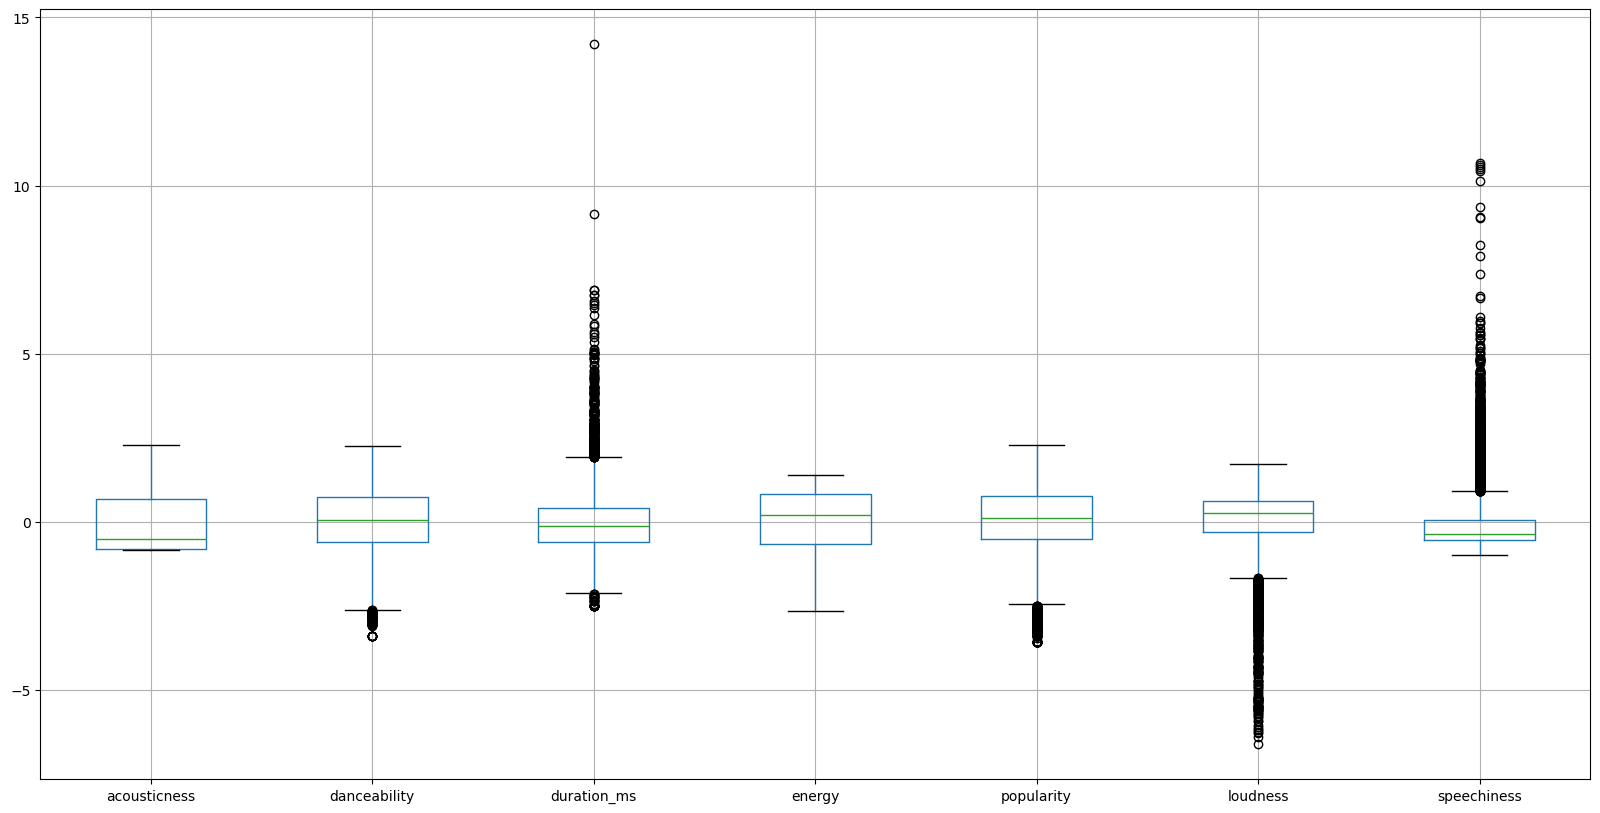

In [38]:
import matplotlib.pyplot as plt

# Create a boxplot for all columns in the 'transformed_df' DataFrame
# The 'figsize' parameter specifies the size of the figure to be 20 inches wide by 10 inches tall
transformed_df.boxplot(figsize=(20, 10))

# Display the boxplot
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import numpy as np

# Define the z-score threshold for detecting outliers
threshold = 3.5  # Adjust this value based on your specific needs

# List of numerical columns to compute z-scores
numerical_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'popularity', 'loudness', 'speechiness']

# Compute the absolute z-scores for the numerical columns
# 'zscore' standardizes the data, and 'np.abs' gets the absolute value of z-scores
zscores = np.abs(transformed_df[numerical_cols].apply(zscore))

# Filter the DataFrame to keep only rows where all z-scores are below the threshold
out_df = transformed_df[(zscores < threshold).all(axis=1)]

# Create a copy of the filtered DataFrame to store the cleaned data
songs_out = out_df.copy()

In [40]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7642 entries, 0 to 8007
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7642 non-null   object 
 1   album_image_url  7642 non-null   object 
 2   track_url        7642 non-null   object 
 3   genres           7642 non-null   object 
 4   Artist           7642 non-null   object 
 5   acousticness     7642 non-null   float64
 6   danceability     7642 non-null   float64
 7   duration_ms      7642 non-null   float64
 8   energy           7642 non-null   float64
 9   popularity       7642 non-null   float64
 10  loudness         7642 non-null   float64
 11  speechiness      7642 non-null   float64
dtypes: float64(7), object(5)
memory usage: 776.1+ KB


In [41]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_col = ['Artist', 'genres']

# Create an instance of LabelEncoder
labelencoder = LabelEncoder()

# Iterate over each categorical column
for column in cat_col:
    # Check if the column exists in the DataFrame
    if column in out_df.columns:
        # Apply LabelEncoder to transform categorical values to integers
        out_df.loc[:, column] = labelencoder.fit_transform(out_df.loc[:, column]).astype('int32')
    else:
        # Print a message if the column is not found in the DataFrame
        print(f"Column '{column}' not found in DataFrame")

In [42]:
out_df

Name  \
0         Blister In The Sun   
1                  Love Song   
2                  I'm Yours   
3                    Hold On   
4                  I'm Yours   
...                      ...   
8003        This Is The Life   
8004   Otan Ponao To Glentao   
8005  Somewhere Only We Know   
8006            Antidepresan   
8007                  6 Days   

                                        album_image_url  \
0     https://i.scdn.co/image/ab67616d0000b27354096a...   
1     https://i.scdn.co/image/ab67616d0000b2731c3e0a...   
2     https://i.scdn.co/image/ab67616d0000b273125b1a...   
3     https://i.scdn.co/image/ab67616d0000b273c60473...   
4     https://i.scdn.co/image/ab67616d0000b27333091f...   
...                                                 ...   
8003  https://i.scdn.co/image/ab67616d0000b27374c0cd...   
8004  https://i.scdn.co/image/ab67616d0000b273e4a245...   
8005  https://i.scdn.co/image/ab67616d0000b2730768aa...   
8006  https://i.scdn.co/image/ab67616d0000b2736a4753...   
8007  https://i.scdn.co/image/ab67616d0000b273ebbfd9...   

                                              track_url genres Artist  \
0     {'spotify': 'https://open.spotify.com/track/7j...      0   2156   
1     {'spotify': 'https://open.spotify.com/track/4E...      0   1705   
2     {'spotify': 'https://open.spotify.com/track/1E...      0    936   
3     {'spotify': 'https://open.spotify.com/track/5v...      0    379   
4     {'spotify': 'https://open.spotify.com/track/3S...      0    936   
...                                                 ...    ...    ...   
8003  {'spotify': 'https://open.spotify.com/track/6y...    110   2128   
8004  {'spotify': 'https://open.spotify.com/track/09...    110   1087   
8005  {'spotify': 'https://open.spotify.com/track/3Z...    110   2128   
8006  {'spotify': 'https://open.spotify.com/track/4O...    110   1302   
8007  {'spotify': 'https://open.spotify.com/track/5i...    110   1240   

      acousticness  danceability  duration_ms    energy  popularity  loudness  \
0         0.146804      0.790040    -0.957038 -0.477337    0.590848 -0.148168   
1        -0.784563     -0.036860     0.552617  0.529941    0.707696  0.912750   
2         0.913479      0.657042     0.340689 -0.853550    0.882967 -0.228373   
3         0.629525      0.165528    -0.247759 -0.857595    0.941391 -0.292906   
4         0.913479      0.657042     0.340689 -0.853550    0.941391 -0.228373   
...            ...           ...          ...       ...         ...       ...   
8003     -0.673190      0.628129    -1.307360  0.978969   -0.343933  0.517072   
8004     -0.361157      1.050253     0.212624  0.643210   -1.103443  0.880483   
8005     -0.597154      0.795822    -1.188410 -0.242710   -0.694476  0.084887   
8006     -0.756483      0.639694     0.303041 -0.266982    0.298729 -0.346929   
8007     -0.757745      1.079166     0.575745  0.178001   -0.227085  0.392247   

      speechiness  
0        0.425463  
1       -0.605835  
2       -0.463247  
3       -0.329265  
4       -0.463247  
...           ...  
8003     0.659011  
8004    -0.514874  
8005    -0.469393  
8006    -0.630419  
8007    -0.566500  

[7642 rows x 12 columns]

<h1>Model-1 Recommendations</h1>

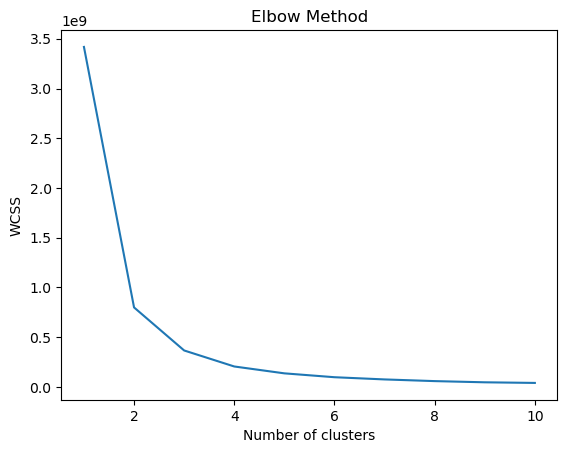

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for different number of clusters
wcss = []

# Iterate over a range of cluster numbers to determine the optimal number of clusters
for i in range(1, 11):
    # Create a KMeans instance with the current number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit the KMeans model to the data (excluding the first three columns of out_df)
    kmeans.fit(out_df.iloc[:, 3:])
    
    # Append the WCSS (sum of squared distances of samples to their closest cluster center) to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters to visualize the Elbow Method
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')  # Label for the x-axis
plt.ylabel('WCSS')  # Label for the y-axis
plt.title('Elbow Method')  # Title of the plot
plt.show()  # Display the plot

<h1>Kmeans clustering</h1>

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the number of clusters (replace with the optimal k obtained from the Elbow Method)
n_clusters = 2  # Example value; replace with the optimal number of clusters

# Create a KMeans instance with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the KMeans model to the data and predict cluster assignments
clusters_1 = kmeans.fit_predict(out_df.iloc[:, 3:])

# Evaluate the clustering result using the silhouette score
# The silhouette score measures how similar each point is to points in its own cluster compared to points in other clusters
sil_score = silhouette_score(out_df.iloc[:, 3:], clusters_1)

# Print the silhouette score for the specified number of clusters
print(f"For n_clusters = {n_clusters}, silhouette score = {sil_score}")

For n_clusters = 2, silhouette score = 0.6405300151610721


In [45]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define the number of clusters (replace with the optimal k obtained from the Elbow Method)
optimal_k = 2  # Example value; replace with the optimal number of clusters

# Create an instance of AgglomerativeClustering with the specified number of clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)

# Fit the AgglomerativeClustering model to the data and predict cluster assignments
clusters_hierarchical = hierarchical.fit_predict(out_df.iloc[:, 3:])

# Evaluate the clustering result using the silhouette score
# The silhouette score measures how similar each point is to points in its own cluster compared to points in other clusters
sil_score_hierarchical = silhouette_score(out_df.iloc[:, 3:], clusters_hierarchical)

# Print the silhouette score for the specified number of clusters using AgglomerativeClustering
print(f'For n_clusters = {optimal_k}, silhouette score (hierarchical): {sil_score_hierarchical}')

For n_clusters = 2, silhouette score (hierarchical): 0.6383891927497704


In [46]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Define the number of components (clusters) for the Gaussian Mixture Model
optimal_k = 2  # Example value; replace with the optimal number of clusters

# Create an instance of GaussianMixture with the specified number of components
gmm = GaussianMixture(n_components=optimal_k, random_state=0)

# Fit the Gaussian Mixture Model to the data and predict cluster assignments
clusters_gmm = gmm.fit_predict(out_df.iloc[:, 3:])

# Evaluate the clustering result using the silhouette score
# The silhouette score measures how similar each point is to points in its own cluster compared to points in other clusters
sil_score_gmm = silhouette_score(out_df.iloc[:, 3:], clusters_gmm)

# Print the silhouette score for the specified number of clusters using GaussianMixture
print(f'For n_clusters = {optimal_k}, Silhouette Score (GMM): {sil_score_gmm}')

For n_clusters = 2, Silhouette Score (GMM): -0.00280214485043661


In [47]:
from sklearn.cluster import DBSCAN

# Ensure that both DataFrames have the same indices
# In this case, both are the same DataFrame, so the common indices will be the same as the original index
common_indices = out_df.index.intersection(out_df.index)

# Align both DataFrames with the common indices (This step is redundant here, as both DataFrames are the same)
aligned_out_df = out_df.loc[common_indices]
aligned_stand_data_out = out_df.loc[common_indices]

# Apply DBSCAN clustering on the relevant features of aligned_out_df
# DBSCAN parameters:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(aligned_out_df.iloc[:, 3:])

# Filter out noise points (DBSCAN labels noise as -1)
filtered_out_df = aligned_out_df[dbscan_labels != -1]

# Select the corresponding rows in aligned_stand_data_out (This step is redundant as both DataFrames are the same)
core_data = aligned_stand_data_out.loc[filtered_out_df.index]

# Print the filtered data excluding noise points
print(core_data)


                                                   Name  \
1033                                          Bin Night   
1040  One, Two, Three, Four, Five, Once I Caught a F...   
1049                                  Five Currant Buns   
1056                                     I Love Oranges   
1061                               Roar Like a Dinosaur   
1064                                   Counting With Me   
3119                               Wrong Side of Heaven   
3122                                   Wash It All Away   
3132                            House of the Rising Sun   
3145                              Welcome To The Circus   
3166                               Wrong Side of Heaven   
3182                            House of The Rising Sun   
3679                                 One Night In Tokyo   
3681                                    Sweet True Lies   
3683                                 Cry Out For A Hero   
3685                                From Hell With Love 

In [48]:
import numpy as np
from sklearn.cluster import DBSCAN, KMeans

# Ensure both DataFrames have the same indices
common_indices = out_df.index.intersection(out_df.index)

# Align both DataFrames with the common indices
aligned_out_df = out_df.loc[common_indices]
aligned_stand_data_out = out_df.loc[common_indices]

# Apply DBSCAN on the relevant features of aligned_out_df
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(aligned_out_df.iloc[:, 3:])

# Filter out noise points (label = -1)
filtered_out_df = aligned_out_df[dbscan_labels != -1]

# Now, select the corresponding rows in aligned_stand_data_out
core_data = aligned_stand_data_out.loc[filtered_out_df.index]

# Ensure core_data contains only numeric data
# If there are non-numeric columns, drop them or convert them
core_data_numeric = core_data.select_dtypes(include=[np.number])

# Check if core_data_numeric is empty
if core_data_numeric.empty:
    raise ValueError("Core data contains no numeric columns suitable for clustering.")

# Define the optimal number of clusters
optimal_k = 2

# Apply KMeans clustering to the core data
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(core_data_numeric)

# Get indices of core data points from DBSCAN
core_data_indices = np.where(dbscan_labels != -1)[0]

# Check if the number of core data indices matches the length of kmeans_labels
if len(core_data_indices) != len(kmeans_labels):
    raise ValueError("Mismatch in length between core_data_indices and kmeans_labels.")

# Create a new array with -1 (indicating unclustered/outliers)
final_labels = np.full(shape=aligned_out_df.shape[0], fill_value=-1)

# Assign K-Means labels to the core points
final_labels[core_data_indices] = kmeans_labels

# Print or use final_labels as needed
print(final_labels)


[-1 -1 -1 ... -1 -1 -1]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
import numpy as np
from sklearn.metrics import silhouette_score

# Check the unique cluster labels from the final clustering result
unique_labels = np.unique(final_labels)
print(f"Unique labels in final_labels: {unique_labels}")

# Only calculate the silhouette score if there is more than one cluster
if len(unique_labels) > 1:
    # Calculate the silhouette score for the clustering result
    # silhouette_score measures how similar each sample is to its own cluster compared to other clusters
    sil_score = silhouette_score(out_df.iloc[:, 3:], final_labels)
    print(f"Silhouette Score for Hybrid Model: {sil_score}")
else:
    # Print a message if only one cluster is detected (silhouette score requires multiple clusters)
    print("Cannot calculate silhouette score. Only one cluster detected.")

Unique labels in final_labels: [-1  0  1]
Silhouette Score for Hybrid Model: -0.34028680957812335


<h3>The normal cluserting models kmeans given the n_clusters=2 the silhouette is</h3> <h1>0.6405300151610721</h1>

<h1>Hybrid method model checking</h1>

In [50]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Apply PCA to reduce the dimensionality of the data
n_components = 2  # Number of principal components to keep (adjust based on your dataset and variance explained)
pca = PCA(n_components=n_components)

# Fit PCA on the data and transform it into the principal component space
pca_data = pca.fit_transform(out_df.iloc[:, 3:])

# Check the amount of variance explained by the selected principal components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by {n_components} components: {sum(explained_variance)}")


Explained variance by 2 components: 0.999987413205801


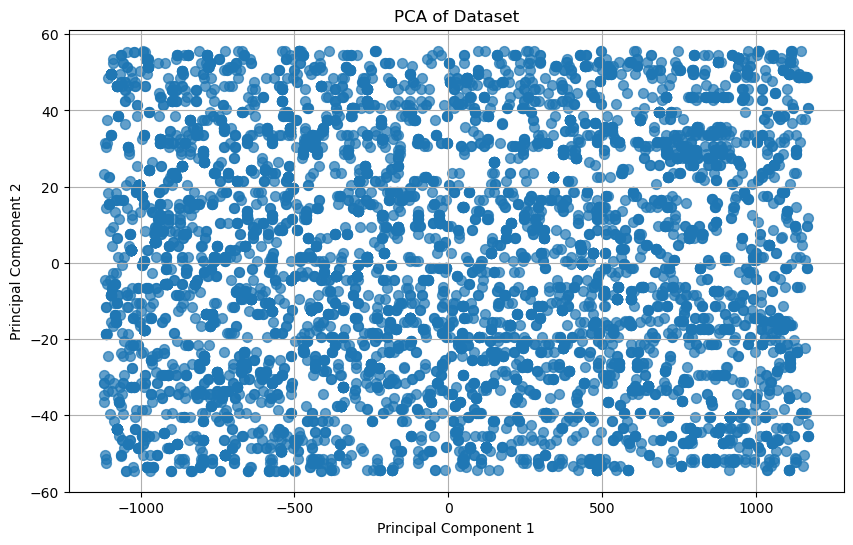

In [51]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Plot the PCA-transformed data
# pca_data[:, 0] and pca_data[:, 1] are the first and second principal components
# alpha controls the transparency of the points, s controls the size of the points
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7, s=50)

# Add a title to the plot
plt.title('PCA of Dataset')

# Label the x-axis and y-axis
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()

<h3>pca is clustering the feature very highly</h3><h1>0.999987413205801
</h1>

In [52]:
optimal_k = 2  # Number of clusters determined to be optimal
kmeans_hyb = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=20, random_state=0)  
# Create a KMeans instance with the optimal number of clusters
# init='k-means++' ensures better initial centroids
# max_iter=300 sets the maximum number of iterations for each run
# n_init=20 increases the number of times the algorithm is run with different centroid seeds to ensure a better result
# random_state=0 ensures reproducibility

# Fit KMeans on the PCA-transformed data and predict cluster labels
clusters_hyb = kmeans_hyb.fit_predict(pca_data)

# Calculate the silhouette score for the clustering result
# The silhouette score measures how well clusters are separated and how similar samples are within the same cluster
sil_score = silhouette_score(pca_data, clusters_hyb)

# Print the silhouette score to evaluate clustering quality
print(f"Improved Silhouette Score: {sil_score}")


Improved Silhouette Score: 0.6405601127553575


In [53]:
# Create a copy of the out_df DataFrame to preserve the original data
out_df = out_df.copy()

# Add a new column 'cluster' to the out_df DataFrame
# Assign the cluster labels obtained from KMeans to this new column
out_df.loc[:, 'cluster'] = clusters_hyb

# Add a new column 'cluster' to the songs_out DataFrame
# Assign the cluster labels obtained from KMeans to this new column
songs_out['cluster'] = clusters_hyb


In [54]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Number of clusters determined to be optimal
optimal_k = 2

# Create an Agglomerative Clustering instance
# n_clusters specifies the number of clusters to form
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)  

# Fit Agglomerative Clustering on the PCA-transformed data and predict cluster labels
agg_clusters = agg_clustering.fit_predict(pca_data)

# Calculate the silhouette score for the Agglomerative Clustering result
# The silhouette score measures the quality of clustering
sil_score = silhouette_score(pca_data, agg_clusters)

# Print the silhouette score to evaluate the clustering quality
print(f"Silhouette Score with Agglomerative Clustering: {sil_score}")

Silhouette Score with Agglomerative Clustering: 0.5930271916001483


In [55]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply t-SNE on PCA-reduced data
# t-SNE (t-Distributed Stochastic Neighbor Embedding) is a technique for dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=0)  # Reduce to 2 components for visualization
tsne_data = tsne.fit_transform(pca_data)  # Transform PCA-reduced data into t-SNE space

# Apply K-Means on t-SNE-transformed data
# K-Means is used to cluster the data in the t-SNE space
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(tsne_data)  # Fit K-Means and predict cluster labels

# Calculate the silhouette score for the K-Means result on t-SNE-transformed data
# The silhouette score measures how well-separated the clusters are and how similar the points within clusters are
sil_score = silhouette_score(tsne_data, clusters)

# Print the silhouette score to evaluate the clustering quality
print(f"Silhouette Score after t-SNE + K-Means: {sil_score}")

Silhouette Score after t-SNE + K-Means: 0.36613380908966064


In [56]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Initialize Gaussian Mixture Model with the number of clusters determined to be optimal
gmm = GaussianMixture(n_components=optimal_k, random_state=0)

# Fit the Gaussian Mixture Model on the PCA-reduced data and predict cluster labels
gmm_clusters = gmm.fit_predict(pca_data)

# Calculate the silhouette score for the clustering result from the Gaussian Mixture Model
# The silhouette score measures the quality of clustering
sil_score = silhouette_score(pca_data, gmm_clusters)

# Print the silhouette score to evaluate the clustering quality with Gaussian Mixture Model
print(f"Silhouette Score with GMM: {sil_score}")


Silhouette Score with GMM: 0.6403827314517843


In [57]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Perform Spectral Clustering
# Spectral Clustering uses eigenvalues of a similarity matrix to reduce dimensions before applying clustering
spectral_clustering = SpectralClustering(n_clusters=optimal_k, affinity='nearest_neighbors', random_state=0)

# Fit the Spectral Clustering model on the PCA-reduced data and predict cluster labels
spectral_clusters = spectral_clustering.fit_predict(pca_data)

# Calculate the silhouette score for the clustering result from Spectral Clustering
# The silhouette score measures the quality of clustering
sil_score = silhouette_score(pca_data, spectral_clusters)

# Print the silhouette score to evaluate the clustering quality with Spectral Clustering
print(f"Silhouette Score with Spectral Clustering: {sil_score}")

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score with Spectral Clustering: -0.05263725442572597


In [58]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

# Perform BIRCH Clustering
# BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is suitable for large datasets
birch = Birch(n_clusters=optimal_k)

# Fit the BIRCH model on the PCA-reduced data and predict cluster labels
birch_clusters = birch.fit_predict(pca_data)

# Calculate the silhouette score for the clustering result from BIRCH
# The silhouette score measures the quality of clustering
sil_score = silhouette_score(pca_data, birch_clusters)

# Print the silhouette score to evaluate the clustering quality with BIRCH
print(f"Silhouette Score with BIRCH: {sil_score}")

Silhouette Score with BIRCH: 0.6251454072302932


In [59]:
from sklearn.metrics import silhouette_score
import numpy as np

# Assume you have a variable `pca_data` or similar for the data

# Dictionary of clustering methods and their results
methods = {
    'kmeans_hyb': clusters_hyb,            # K-Means clustering results
    "Agglomerative Clustering": agg_clusters,  # Agglomerative Clustering results
    "GMM": gmm_clusters,                    # Gaussian Mixture Model results
    "Spectral Clustering": spectral_clusters,  # Spectral Clustering results
    "BIRCH": birch_clusters,                # BIRCH clustering results
}

# Loop through each method and its clustering results
for method, clusters in methods.items():
    # Check if the number of unique clusters is more than 1
    if len(np.unique(clusters)) > 1:
        # Compute the silhouette score for the clusters
        sil_score = silhouette_score(pca_data, clusters)
        # Print the silhouette score for the current method
        print(f"{method} Silhouette Score: {sil_score}")
    else:
        # Print a message if the number of clusters is less than 2
        print(f"{method} Silhouette Score: Cannot be computed. Number of clusters is less than 2.")

kmeans_hyb Silhouette Score: 0.6405601127553575
Agglomerative Clustering Silhouette Score: 0.5930271916001483
GMM Silhouette Score: 0.6403827314517843
Spectral Clustering Silhouette Score: -0.05263725442572597
BIRCH Silhouette Score: 0.6251454072302932


<h3>The hybrid techinque models the kmean is good silhouette score</h3><h1>0.6405601127553575</h1>
<h3>I doing the recommendation model buliding hybrid techinque in this using pca and kmeans it was clustering data is more prefect</h3>

In [60]:
out_df = out_df.copy()
out_df['cluster'] = clusters_hyb

<h1>Recommendation system model buliding-1</h1>

In [61]:
def recommend_songs(song_name, data, num_recommendations):
    # Convert the input song name to lowercase and strip any leading/trailing spaces
    song_name = song_name.lower().strip()
    
    # Ensure the 'Name' column in the data is also in lowercase for case-insensitive comparison
    data['Name'] = data['Name'].str.lower()
    
    # Check if the song name exists in the DataFrame
    if song_name in data['Name'].values:
        # Retrieve the cluster of the input song
        cluster = data.loc[data['Name'] == song_name, 'cluster'].values[0]
        
        # Get recommendations from the same cluster excluding the input song itself
        recommendations = data[(data['cluster'] == cluster) & (data['Name'] != song_name)].sample(num_recommendations)
        
        # Return the recommended songs with specific columns
        return recommendations[['Name', 'Artist', 'genres', 'album_image_url', 'track_url']]
    else:
        # If the song is not found, return an empty DataFrame with the expected columns
        return pd.DataFrame(columns=['Name', 'Artist', 'genres', 'album_image_url', 'track_url'])

In [62]:
# Example call to get recommendations
recommendations = recommend_songs("I'm Yours", songs_out, 10)

# Display the recommendations
recommendations

Name                Artist  \
2587                 freak on a leash                  Korn   
1021                  rock-a-bye baby             CoComelon   
4209                       apocalypse  Cigarettes After Sex   
7342                 someone like you                 Adele   
5377                  little paradise          Eliane Elias   
1806  get down on it - single version       Kool & The Gang   
7007                      someone new                Hozier   
6423                 i wanna be yours        Arctic Monkeys   
4753     something's got a hold on me            Etta James   
7906                          roygbiv      Boards of Canada   

                 genres                                    album_image_url  \
2587               funk  https://i.scdn.co/image/ab67616d0000b27350d216...   
1021           children  https://i.scdn.co/image/ab67616d0000b2735f0f6a...   
4209          indie-pop  https://i.scdn.co/image/ab67616d0000b273d09fdd...   
7342               soul  https://i.scdn.co/image/ab67616d0000b273164feb...   
5377                mpb  https://i.scdn.co/image/ab67616d0000b2732fa73b...   
1806              disco  https://i.scdn.co/image/ab67616d0000b2737f2939...   
7007  singer-songwriter  https://i.scdn.co/image/ab67616d0000b2734ca68d...   
6423               rock  https://i.scdn.co/image/ab67616d0000b2734ae1c4...   
4753               jazz  https://i.scdn.co/image/ab67616d0000b273617f78...   
7906           trip-hop  https://i.scdn.co/image/ab67616d0000b2739effb2...   

                                              track_url  
2587  {'spotify': 'https://open.spotify.com/track/6W...  
1021  {'spotify': 'https://open.spotify.com/track/3N...  
4209  {'spotify': 'https://open.spotify.com/track/2N...  
7342  {'spotify': 'https://open.spotify.com/track/3b...  
5377  {'spotify': 'https://open.spotify.com/track/7p...  
1806  {'spotify': 'https://open.spotify.com/track/2j...  
7007  {'spotify': 'https://open.spotify.com/track/2D...  
6423  {'spotify': 'https://open.spotify.com/track/5X...  
4753  {'spotify': 'https://open.spotify.com/track/6E...  
7906  {'spotify': 'https://open.spotify.com/track/5H...

<h1>Model-2 Tfidvectorizer and cosine Similarity Recommendations system</h1>

In [63]:
genre_clean.head()

Name            Artist    genres  acousticness  danceability  \
0  Blister In The Sun    Violent Femmes  acoustic        0.3160         0.726   
1           Love Song    Sara Bareilles  acoustic        0.0208         0.583   
2           I'm Yours        Jason Mraz  acoustic        0.5590         0.703   
3             Hold On  Chord Overstreet  acoustic        0.4690         0.618   
4           I'm Yours        Jason Mraz  acoustic        0.5590         0.703   

   duration_ms  energy  instrumentalness  liveness  loudness  speechiness  \
0       145706   0.537               0.0    0.0707    -8.896       0.1140   
1       258826   0.786               0.0    0.1880    -3.142       0.0301   
2       242946   0.444               0.0    0.0973    -9.331       0.0417   
3       198853   0.443               0.0    0.0829    -9.681       0.0526   
4       242946   0.444               0.0    0.0973    -9.331       0.0417   

     tempo  valence  popularity  mode  key  \
0   96.889    0.882          71     1    0   
1  123.055    0.573          73     0    2   
2  150.960    0.712          76     1   11   
3  119.949    0.167          77     1    2   
4  150.960    0.712          77     1   11   

                                     album_image_url  \
0  https://i.scdn.co/image/ab67616d0000b27354096a...   
1  https://i.scdn.co/image/ab67616d0000b2731c3e0a...   
2  https://i.scdn.co/image/ab67616d0000b273125b1a...   
3  https://i.scdn.co/image/ab67616d0000b273c60473...   
4  https://i.scdn.co/image/ab67616d0000b27333091f...   

                                           track_url  
0  {'spotify': 'https://open.spotify.com/track/7j...  
1  {'spotify': 'https://open.spotify.com/track/4E...  
2  {'spotify': 'https://open.spotify.com/track/1E...  
3  {'spotify': 'https://open.spotify.com/track/5v...  
4  {'spotify': 'https://open.spotify.com/track/3S...

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
# Ensure you're working on a copy of the DataFrame
genre_clean = genre_clean.copy()

# Explicitly cast columns to appropriate types before converting to string
for col in genre_clean.columns:
    if pd.api.types.is_numeric_dtype(genre_clean[col]):
        genre_clean.loc[:, col] = genre_clean[col].astype(float).astype(str)
    else:
        genre_clean.loc[:, col] = genre_clean[col].astype(str)

# Combine text and numerical features
genre_clean['Combined'] = (
    genre_clean['Artist'] + ' ' +
    genre_clean['genres'] + ' ' +
    genre_clean['acousticness'] + ' ' +
    genre_clean['danceability'] + ' ' +
    genre_clean['duration_ms'] + ' ' +
    genre_clean['energy'] + ' ' +
    genre_clean['instrumentalness'] + ' ' +
    genre_clean['liveness'] + ' ' +
    genre_clean['loudness'] + ' ' +
    genre_clean['speechiness'] + ' ' +
    genre_clean['tempo'] + ' ' +
    genre_clean['valence'] + ' ' +
    genre_clean['popularity'] + ' ' +
    genre_clean['mode'] + ' ' +
    genre_clean['key'] + ' ' +
    genre_clean['album_image_url'] + ' ' +
    genre_clean['track_url']
)

# Display the DataFrame with the combined column
print(genre_clean['Combined'])

0        Violent Femmes acoustic 0.316 0.726 145706.0 0...
1        Sara Bareilles acoustic 0.0208 0.583 258826.0 ...
2        Jason Mraz acoustic 0.559 0.703 242946.0 0.444...
3        Chord Overstreet acoustic 0.469 0.618 198853.0...
4        Jason Mraz acoustic 0.559 0.703 242946.0 0.444...
                               ...                        
21761    Umur Anil Gokdag turkish 0.0561 0.698 119456.0...
21762    Knock Out turkish 0.155 0.771 233350.0 0.814 0...
21768    Umur Anil Gokdag turkish 0.0802 0.727 128369.0...
21770    Mert Demir turkish 0.0297 0.7 240125.0 0.589 1...
21802    Mahmut Orhan turkish 0.0293 0.776 260559.0 0.6...
Name: Combined, Length: 7656, dtype: object


C:\Users\Dell\AppData\Local\Temp\ipykernel_13912\904523689.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.316' '0.0208' '0.559' ... '0.0802' '0.0297' '0.0293']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  genre_clean.loc[:, col] = genre_clean[col].astype(float).astype(str)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13912\904523689.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.726' '0.583' '0.703' ... '0.727' '0.7' '0.776']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  genre_clean.loc[:, col] = genre_clean[col].astype(float).astype(str)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13912\904523689.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['145706.0' '258826

In [66]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the combined text data
tfidf_matrix = tfidf_vectorizer.fit_transform(genre_clean['Combined'])
# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [67]:
tfidf_matrix 

<7656x22155 sparse matrix of type '<class 'numpy.float64'>'
	with 183890 stored elements in Compressed Sparse Row format>

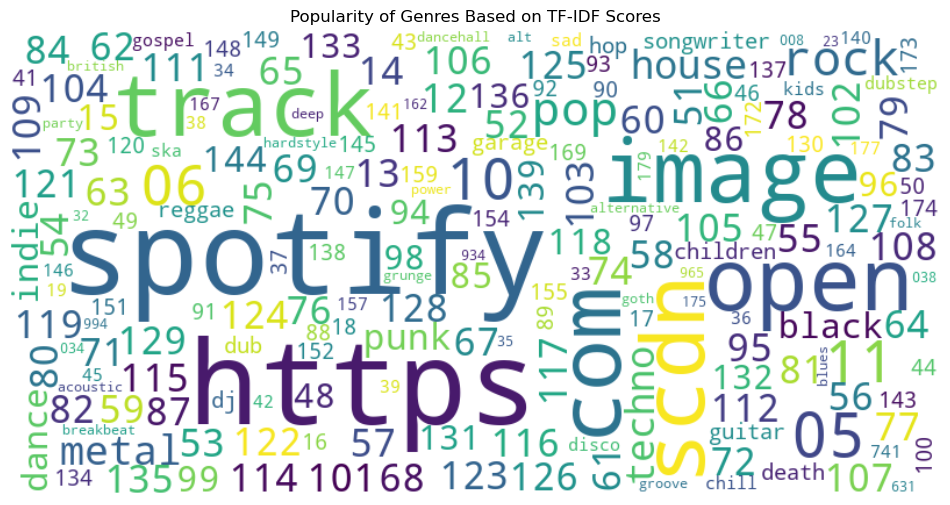

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sum the TF-IDF scores for each genre
genre_popularity = tfidf_df.sum(axis=0)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_font_size=100).generate_from_frequencies(genre_popularity)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for word cloud
plt.title('Popularity of Genres Based on TF-IDF Scores')
plt.show()


In [69]:
# Calculate cosine similarity between all items
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.05690151, 0.08867897, ..., 0.04138445, 0.01640529,
        0.01665243],
       [0.05690151, 1.        , 0.05542201, ..., 0.01561655, 0.01595086,
        0.01619116],
       [0.08867897, 0.05542201, 1.        , ..., 0.01564384, 0.02782043,
        0.01621945],
       ...,
       [0.04138445, 0.01561655, 0.01564384, ..., 1.        , 0.05597073,
        0.05681392],
       [0.01640529, 0.01595086, 0.02782043, ..., 0.05597073, 1.        ,
        0.05803016],
       [0.01665243, 0.01619116, 0.01621945, ..., 0.05681392, 0.05803016,
        1.        ]])

In [70]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Assuming `genre_clean['Combined']` is the feature set after vectorization
# First, perform TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(genre_clean['Combined'])

# Apply PCA to reduce dimensions
desired_n_components = 2
pca = PCA(n_components=desired_n_components)
pca_features_cosine = pca.fit_transform(tfidf_matrix.toarray())

# Now, compute cosine similarity on the reduced data
cosine_sim = cosine_similarity(pca_features_cosine)

# pca_features will be the reduced dimensional representation
# cosine_sim will be the cosine similarity matrix of the reduced features

In [71]:
from sklearn.cluster import KMeans

# Choose the number of clusters `k`
k=2
kmeans_cosine = KMeans(n_clusters=k)
kmeans_clusters_cosine = kmeans_cosine.fit_predict(pca_features_cosine)


In [72]:
import numpy as np

# Cluster labels
labels_cosine = kmeans_cosine.labels_

# Optionally: Assess silhouette score or other metrics
from sklearn.metrics import silhouette_score

score_cosine = silhouette_score(pca_features_cosine, labels_cosine)
print(f'Silhouette Score: {score_cosine}')


Silhouette Score: 0.9332881935890232


<h3>Using Tifid convering the dataset varaiables the cosine similarity both are using to clustering techinque in kmeans it was given the very good silhoute score</h3><h1>0.931082974152793</h1>

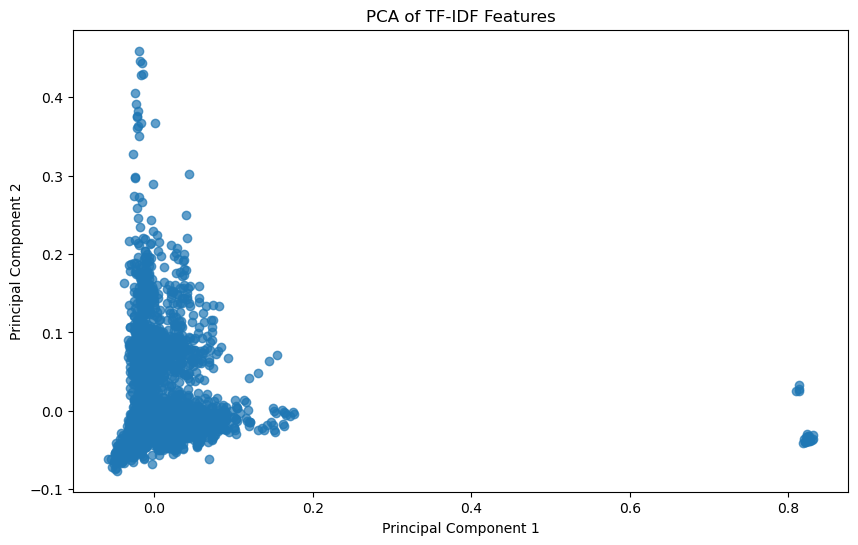

In [73]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


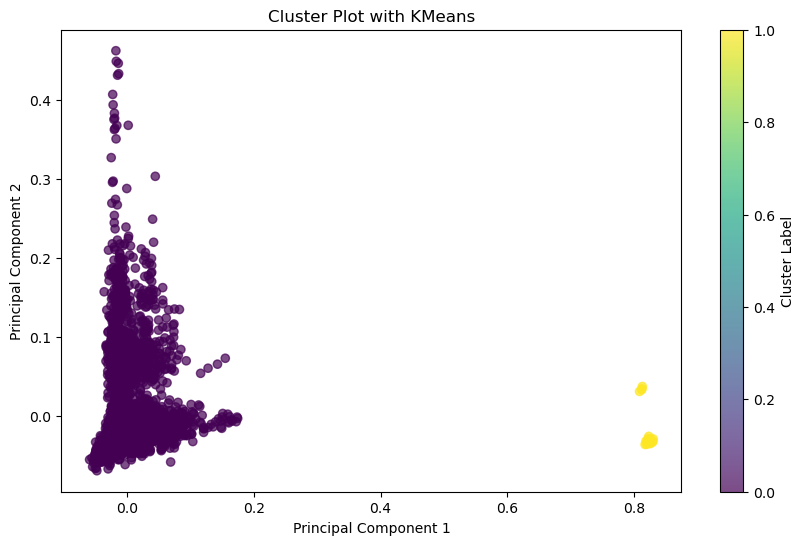

In [74]:
# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_features_cosine[:, 0], pca_features_cosine[:, 1], c=labels_cosine, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot with KMeans')
plt.show()

In [80]:
genre_cosine=genre_clean.copy()

In [81]:
import pandas as pd

# Assuming genre_clean is defined earlier in your code
if not isinstance(genre_clean, pd.DataFrame):
    genre_cosine = pd.DataFrame(genre_clean)

print(type(genre_cosine))


<class 'pandas.core.frame.DataFrame'>


In [83]:
genre_cosine.head()

Name            Artist    genres acousticness danceability  \
0  Blister In The Sun    Violent Femmes  acoustic        0.316        0.726   
1           Love Song    Sara Bareilles  acoustic       0.0208        0.583   
2           I'm Yours        Jason Mraz  acoustic        0.559        0.703   
3             Hold On  Chord Overstreet  acoustic        0.469        0.618   
4           I'm Yours        Jason Mraz  acoustic        0.559        0.703   

  duration_ms energy instrumentalness liveness loudness speechiness    tempo  \
0    145706.0  0.537              0.0   0.0707   -8.896       0.114   96.889   
1    258826.0  0.786              0.0    0.188   -3.142      0.0301  123.055   
2    242946.0  0.444              0.0   0.0973   -9.331      0.0417   150.96   
3    198853.0  0.443              0.0   0.0829   -9.681      0.0526  119.949   
4    242946.0  0.444              0.0   0.0973   -9.331      0.0417   150.96   

  valence popularity mode   key  \
0   0.882       71.0  1.0   0.0   
1   0.573       73.0  0.0   2.0   
2   0.712       76.0  1.0  11.0   
3   0.167       77.0  1.0   2.0   
4   0.712       77.0  1.0  11.0   

                                     album_image_url  \
0  https://i.scdn.co/image/ab67616d0000b27354096a...   
1  https://i.scdn.co/image/ab67616d0000b2731c3e0a...   
2  https://i.scdn.co/image/ab67616d0000b273125b1a...   
3  https://i.scdn.co/image/ab67616d0000b273c60473...   
4  https://i.scdn.co/image/ab67616d0000b27333091f...   

                                           track_url  \
0  {'spotify': 'https://open.spotify.com/track/7j...   
1  {'spotify': 'https://open.spotify.com/track/4E...   
2  {'spotify': 'https://open.spotify.com/track/1E...   
3  {'spotify': 'https://open.spotify.com/track/5v...   
4  {'spotify': 'https://open.spotify.com/track/3S...   

                                            Combined  
0  Violent Femmes acoustic 0.316 0.726 145706.0 0...  
1  Sara Bareilles acoustic 0.0208 0.583 258826.0 ...  
2  Jason Mraz acoustic 0.559 0.703 242946.0 0.444...  
3  Chord Overstreet acoustic 0.469 0.618 198853.0...  
4  Jason Mraz acoustic 0.559 0.703 242946.0 0.444...

<h1>Recommendation model buliding-2(kmeans)</h1>

In [84]:
genre_cosine.loc[:,'cluster'] = labels_cosine

In [85]:
genre_cosine.loc[:,'cluster'] = labels_cosine
# Function to recommend songs from the same cluster
def recommend_songs(song_name, data, num_recommendations):
    # Converting to lower case
    song_name=song_name.lower().strip()
    data.loc[:,'Name']=data.loc[:,'Name'].str.lower()
    # checks if the song name is in the list of names of the dataset
    if song_name in data['Name'].values:
        # cluster stores the cluser id of the song
        cluster = data.loc[data['Name'] == song_name, 'cluster'].values[0]
    # recommendation stores the sample of recommended songs
    recommendations = data[(data['cluster'] == cluster) & (data['Name'] != song_name)].sample(num_recommendations)
    return recommendations[['Name','Artist','genres','album_image_url','track_url']]

# Storing the list of recommended songs
recommendations = recommend_songs("I'm Yours",genre_cosine,10)
recommendations

Name                Artist     genres  \
12299                   blue sky  Allman Brothers Band     j-rock   
10492            la nuit - mixed           Bochum Welt        idm   
17321               daddy issues     The Neighbourhood       rock   
16698                   vanished       Crystal Castles      r-n-b   
18420               want me back         SiAngie Twins      salsa   
13123                 la bachata         Manuel Turizo      latin   
3295          tell ur girlfriend             Lay Bankz       club   
20125      puedes contar conmigo  La Oreja de Van Gogh    spanish   
1569   down to the river to pray         Alison Krauss  bluegrass   
12303                     love i             The Green     j-rock   

                                         album_image_url  \
12299  https://i.scdn.co/image/ab67616d0000b2734bc9f9...   
10492  https://i.scdn.co/image/ab67616d0000b273419238...   
17321  https://i.scdn.co/image/ab67616d0000b273306658...   
16698  https://i.scdn.co/image/ab67616d0000b273db4e50...   
18420  https://i.scdn.co/image/ab67616d0000b27319e105...   
13123  https://i.scdn.co/image/ab67616d0000b2734dd995...   
3295   https://i.scdn.co/image/ab67616d0000b273a8dbff...   
20125  https://i.scdn.co/image/ab67616d0000b273820f6e...   
1569   https://i.scdn.co/image/ab67616d0000b273a7e90e...   
12303  https://i.scdn.co/image/ab67616d0000b273e2a6bb...   

                                               track_url  
12299  {'spotify': 'https://open.spotify.com/track/6i...  
10492  {'spotify': 'https://open.spotify.com/track/3Y...  
17321  {'spotify': 'https://open.spotify.com/track/5E...  
16698  {'spotify': 'https://open.spotify.com/track/4b...  
18420  {'spotify': 'https://open.spotify.com/track/0d...  
13123  {'spotify': 'https://open.spotify.com/track/3t...  
3295   {'spotify': 'https://open.spotify.com/track/3l...  
20125  {'spotify': 'https://open.spotify.com/track/1h...  
1569   {'spotify': 'https://open.spotify.com/track/79...  
12303  {'spotify': 'https://open.spotify.com/track/4H...

In [86]:
import pickle

# Prepare the data to be saved
data_to_save = {
    'genre_cosine': genre_clean,
    'labels_cosine': labels_cosine
}

# Save to a pickle file
filename = 'Genres_Recommendation.pkl'
with open(filename, 'wb') as file:
    pickle.dump(data_to_save, file)


In [87]:
import pickle

# Load the data from the pickle file
filename = 'Genres_Recommendation.pkl'
with open(filename, 'rb') as file:
    loaded_data = pickle.load(file)


In [ ]:
# Extract the DataFrame and labels
genre_clean = loaded_data['genre_cosine']
labels_cosine = loaded_data['labels_cosine']

# Verify the type of genre_clean
print(type(genre_clean))